# PHÂN TÍCH DỮ LIỆU TRẦM CẢM Ở SINH VIÊN

## Student Depression Dataset Analysis

In [54]:
# ============================================
# CELL 1: Import Libraries
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_recall_curve, f1_score)
from sklearn.inspection import permutation_importance
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1.1 Khái quát dữ liệu

**Tên tập dữ liệu:** Student Depression Dataset

**Mô tả ngắn gọn:** 
- Tập dữ liệu này thu thập thông tin về sức khỏe tinh thần của sinh viên, 
  bao gồm các yếu tố nhân khẩu học, học tập, lối sống và tâm lý.
- Mục tiêu chính: Phân tích và dự đoán tình trạng trầm cảm ở sinh viên.

**Quy mô dữ liệu:**
- Tổng số bản ghi: {:,} sinh viên
- Tổng số thuộc tính: {} cột
- Dữ liệu được thu thập từ các thành phố ở Ấn Độ

In [55]:
# ============================================
# CELL 2: Load và khái quát dữ liệu
# ============================================
# Load dữ liệu
df = pd.read_csv('../data/student_depression_dataset.csv')

# Hiển thị thông tin cơ bản
print("\n" + "="*60)
print("THÔNG TIN CƠ BẢN VỀ DỮ LIỆU")
print("="*60)
print(f"\n📊 Kích thước: {df.shape[0]:,} dòng x {df.shape[1]} cột")
print(f"\n📝 Các cột trong dữ liệu:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")


THÔNG TIN CƠ BẢN VỀ DỮ LIỆU

📊 Kích thước: 27,901 dòng x 18 cột

📝 Các cột trong dữ liệu:
    1. id
    2. Gender
    3. Age
    4. City
    5. Profession
    6. Academic Pressure
    7. Work Pressure
    8. CGPA
    9. Study Satisfaction
   10. Job Satisfaction
   11. Sleep Duration
   12. Dietary Habits
   13. Degree
   14. Have you ever had suicidal thoughts ?
   15. Work/Study Hours
   16. Financial Stress
   17. Family History of Mental Illness
   18. Depression


In [56]:
# ============================================
# CELL 3: Mô tả chi tiết từng cột
# ============================================

# Dictionary mô tả các cột
column_descriptions = {
    'id': {
        'type': 'Numerical (ID)',
        'description': 'Mã định danh duy nhất cho mỗi sinh viên',
        'values': 'Số nguyên dương'
    },
    'Gender': {
        'type': 'Categorical',
        'description': 'Giới tính của sinh viên',
        'values': 'Male, Female'
    },
    'Age': {
        'type': 'Numerical (Continuous)',
        'description': 'Tuổi của sinh viên',
        'values': 'Số nguyên (18-35+)'
    },
    'City': {
        'type': 'Categorical',
        'description': 'Thành phố sinh sống/học tập',
        'values': 'Các thành phố ở Ấn Độ'
    },
    'Profession': {
        'type': 'Categorical',
        'description': 'Nghề nghiệp (trong dataset này chủ yếu là Student)',
        'values': 'Student, Working Professional...'
    },
    'Academic Pressure': {
        'type': 'Numerical (Ordinal)',
        'description': 'Mức độ áp lực học tập (tự đánh giá)',
        'values': '1-5 (1: Thấp nhất, 5: Cao nhất)'
    },
    'Work Pressure': {
        'type': 'Numerical (Ordinal)',
        'description': 'Mức độ áp lực công việc',
        'values': '0-5 (0 nếu không đi làm)'
    },
    'CGPA': {
        'type': 'Numerical (Continuous)',
        'description': 'Điểm trung bình tích lũy (Cumulative Grade Point Average)',
        'values': '0.0-10.0'
    },
    'Study Satisfaction': {
        'type': 'Numerical (Ordinal)',
        'description': 'Mức độ hài lòng với việc học',
        'values': '1-5 (1: Rất không hài lòng, 5: Rất hài lòng)'
    },
    'Job Satisfaction': {
        'type': 'Numerical (Ordinal)',
        'description': 'Mức độ hài lòng với công việc',
        'values': '0-5 (0 nếu không có việc làm)'
    },
    'Sleep Duration': {
        'type': 'Categorical (Ordinal)',
        'description': 'Thời gian ngủ trung bình mỗi ngày',
        'values': "'Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'"
    },
    'Dietary Habits': {
        'type': 'Categorical (Ordinal)',
        'description': 'Thói quen ăn uống',
        'values': 'Healthy, Moderate, Unhealthy'
    },
    'Degree': {
        'type': 'Categorical',
        'description': 'Bằng cấp đang theo học',
        'values': "Class 12, BA, BSc, BE, B.Com, MBA, PhD, ..."
    },
    'Have you ever had suicidal thoughts ?': {
        'type': 'Categorical (Binary)',
        'description': 'Đã từng có suy nghĩ tự tử chưa',
        'values': 'Yes, No'
    },
    'Work/Study Hours': {
        'type': 'Numerical (Continuous)',
        'description': 'Số giờ học/làm việc mỗi ngày',
        'values': '0-12+'
    },
    'Financial Stress': {
        'type': 'Numerical (Ordinal)',
        'description': 'Mức độ stress về tài chính',
        'values': '1-5 (1: Thấp nhất, 5: Cao nhất)'
    },
    'Family History of Mental Illness': {
        'type': 'Categorical (Binary)',
        'description': 'Gia đình có tiền sử bệnh tâm thần',
        'values': 'Yes, No'
    },
    'Depression': {
        'type': 'Categorical (Binary) - TARGET',
        'description': '⭐ BIẾN MỤC TIÊU: Tình trạng trầm cảm',
        'values': '0: Không trầm cảm, 1: Có trầm cảm'
    }
}

# Hiển thị bảng mô tả
print("\n" + "="*80)
print("MÔ TẢ CHI TIẾT CÁC THUỘC TÍNH")
print("="*80)

desc_data = []
for col, info in column_descriptions.items():
    desc_data.append({
        'Tên cột': col,
        'Loại dữ liệu': info['type'],
        'Mô tả': info['description'],
        'Giá trị': info['values']
    })

desc_df = pd.DataFrame(desc_data)
display(desc_df.style.set_properties(**{'text-align': 'left'}))

# Phân loại biến
print("\n" + "="*60)
print("PHÂN LOẠI BIẾN")
print("="*60)

numerical_vars = ['Age', 'CGPA', 'Work/Study Hours', 'Academic Pressure', 
                  'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 
                  'Financial Stress']
categorical_vars = ['Gender', 'City', 'Profession', 'Sleep Duration', 
                   'Dietary Habits', 'Degree', 
                   'Have you ever had suicidal thoughts ?',
                   'Family History of Mental Illness']
target_var = 'Depression'

print(f"\n📊 Biến số (Numerical): {len(numerical_vars)} biến")
for v in numerical_vars:
    print(f"   - {v}")

print(f"\n📋 Biến phân loại (Categorical): {len(categorical_vars)} biến")
for v in categorical_vars:
    print(f"   - {v}")

print(f"\n🎯 Biến mục tiêu (Target): {target_var}")


MÔ TẢ CHI TIẾT CÁC THUỘC TÍNH


,Tên cột,Loại dữ liệu,Mô tả,Giá trị
0,id,Numerical (ID),Mã định danh duy nhất cho mỗi sinh viên,Số nguyên dương
1,Gender,Categorical,Giới tính của sinh viên,"Male, Female"
2,Age,Numerical (Continuous),Tuổi của sinh viên,Số nguyên (18-35+)
3,City,Categorical,Thành phố sinh sống/học tập,Các thành phố ở Ấn Độ
4,Profession,Categorical,Nghề nghiệp (trong dataset này chủ yếu là Student),"Student, Working Professional..."
5,Academic Pressure,Numerical (Ordinal),Mức độ áp lực học tập (tự đánh giá),"1-5 (1: Thấp nhất, 5: Cao nhất)"
6,Work Pressure,Numerical (Ordinal),Mức độ áp lực công việc,0-5 (0 nếu không đi làm)
7,CGPA,Numerical (Continuous),Điểm trung bình tích lũy (Cumulative Grade Point Average),0.0-10.0
8,Study Satisfaction,Numerical (Ordinal),Mức độ hài lòng với việc học,"1-5 (1: Rất không hài lòng, 5: Rất hài lòng)"
9,Job Satisfaction,Numerical (Ordinal),Mức độ hài lòng với công việc,0-5 (0 nếu không có việc làm)



PHÂN LOẠI BIẾN

📊 Biến số (Numerical): 8 biến
   - Age
   - CGPA
   - Work/Study Hours
   - Academic Pressure
   - Work Pressure
   - Study Satisfaction
   - Job Satisfaction
   - Financial Stress

📋 Biến phân loại (Categorical): 8 biến
   - Gender
   - City
   - Profession
   - Sleep Duration
   - Dietary Habits
   - Degree
   - Have you ever had suicidal thoughts ?
   - Family History of Mental Illness

🎯 Biến mục tiêu (Target): Depression


## 1.3 Nguồn dữ liệu

### Thông tin chính
- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data
- **Tác giả:** Adil Shamim
- **Usability Score:** 10.0/10

### Bối cảnh thu thập
- Dữ liệu được thu thập từ sinh viên tại các thành phố ở Ấn Độ
- Bao gồm nhiều trường đại học và cấp bậc học khác nhau
- Dữ liệu tự báo cáo (self-reported) thông qua khảo sát

### Đặc điểm nổi bật của dataset
1. **Quy mô lớn:** ~27,901 bản ghi - đủ lớn cho phân tích thống kê
2. **Đa chiều:** Bao gồm yếu tố nhân khẩu học, học tập, lối sống, tâm lý
3. **Thực tiễn:** Dữ liệu từ môi trường học tập thực tế
4. **Cân bằng hợp lý:** Tỷ lệ trầm cảm/không trầm cảm không quá chênh lệch

### Lưu ý về dữ liệu
- Dữ liệu tự báo cáo có thể có bias
- Không có thông tin về phương pháp chẩn đoán trầm cảm cụ thể
- Cần thận trọng khi tổng quát hóa kết quả

## 1.4 Lý do chọn tập dữ liệu

### 1. Tính thời sự và cấp thiết
- **Khủng hoảng sức khỏe tâm thần toàn cầu:** WHO xác định trầm cảm là một trong những 
  nguyên nhân hàng đầu gây ra rối loạn sức khỏe tâm thần ở nhóm tuổi sinh sản
- **Ảnh hưởng đến sinh viên:** Áp lực học tập, định hướng nghề nghiệp, và chuyển đổi 
  cuộc sống đều góp phần vào nguy cơ trầm cảm

### 2. Giá trị nghiên cứu
- **Nhiều chiều dữ liệu:** Cho phép phân tích đa yếu tố
- **Biến mục tiêu rõ ràng:** Binary classification - dễ dàng đánh giá mô hình
- **Quy mô đủ lớn:** >27,000 mẫu đảm bảo độ tin cậy thống kê

### 3. Ứng dụng thực tiễn
- **Cảnh báo sớm:** Có thể xây dựng hệ thống phát hiện sớm sinh viên có nguy cơ
- **Định hướng can thiệp:** Xác định các yếu tố rủi ro để đề xuất biện pháp
- **Hỗ trợ chính sách:** Cung cấp insights cho các cơ sở giáo dục

### 4. Tính khả thi kỹ thuật
- **Dữ liệu sạch:** Ít missing values
- **Cấu trúc rõ ràng:** Dễ preprocessing
- **Phù hợp ML:** Có thể áp dụng nhiều thuật toán khác nhau

### Câu hỏi nghiên cứu chính
1. Yếu tố nào ảnh hưởng mạnh nhất đến trầm cảm ở sinh viên?
2. Có thể dự đoán trầm cảm dựa trên các đặc điểm có sẵn không?
3. Mối quan hệ giữa áp lực học tập và các yếu tố khác như thế nào?

In [57]:
# ============================================
# CELL 6: Tổng quan dữ liệu
# ============================================

print("="*70)
print("2. PHÂN TÍCH CƠ BẢN VÀ TỔNG QUAN")
print("="*70)

# 2.1 Xem mẫu dữ liệu
print("\n📊 2.1 Mẫu dữ liệu đầu tiên:")
display(df.head(10))

print("\n📊 2.2 Thông tin tổng quan:")
print(df.info())

print("\n📊 2.3 Thống kê mô tả cho biến số:")
display(df.describe())

print("\n📊 2.4 Thống kê mô tả cho biến phân loại:")
display(df.describe(include='object'))

2. PHÂN TÍCH CƠ BẢN VÀ TỔNG QUAN

📊 2.1 Mẫu dữ liệu đầu tiên:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1



📊 2.2 Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         279

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000



📊 2.4 Thống kê mô tả cho biến phân loại:


,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


In [58]:
# ============================================
# CELL 7: Phân tích Missing Values
# ============================================

print("\n" + "="*60)
print("2.5 PHÂN TÍCH MISSING VALUES")
print("="*60)

# Tính missing values
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing %', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Các cột có giá trị thiếu:")
    display(missing_data)
    
    # Visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_data['Missing %'].plot(kind='barh', color='coral', ax=ax)
    ax.set_xlabel('Tỷ lệ Missing (%)')
    ax.set_title('Tỷ lệ Missing Values theo cột')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ Không có missing values trong dữ liệu!")

# Kiểm tra duplicate
duplicates = df.duplicated().sum()
print(f"\n📋 Số bản ghi trùng lặp: {duplicates}")


2.5 PHÂN TÍCH MISSING VALUES

✅ Không có missing values trong dữ liệu!

📋 Số bản ghi trùng lặp: 0


In [59]:
# ============================================
# CELL 8: Kiểm tra và xử lý data types
# ============================================

print("\n" + "="*60)
print("2.6 KIỂM TRA VÀ XỬ LÝ DỮ LIỆU")
print("="*60)

# Kiểm tra giá trị unique của các cột categorical
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 
                   'Dietary Habits', 'Degree', 
                   'Have you ever had suicidal thoughts ?',
                   'Family History of Mental Illness']

print("\n📋 Giá trị unique của các biến categorical:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"   Unique values: {df[col].nunique()}")
        print(f"   Values: {df[col].unique()[:10]}...")  # Hiển thị tối đa 10

# Kiểm tra giá trị của biến target
print(f"\n🎯 Phân phối biến mục tiêu (Depression):")
print(df['Depression'].value_counts())
print(f"\nTỷ lệ: {df['Depression'].value_counts(normalize=True).round(3)}")


2.6 KIỂM TRA VÀ XỬ LÝ DỮ LIỆU

📋 Giá trị unique của các biến categorical:

Gender:
   Unique values: 2
   Values: ['Male' 'Female']...

City:
   Unique values: 52
   Values: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik']...

Profession:
   Unique values: 14
   Values: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef']...

Sleep Duration:
   Unique values: 5
   Values: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']...

Dietary Habits:
   Unique values: 4
   Values: ['Healthy' 'Moderate' 'Unhealthy' 'Others']...

Degree:
   Unique values: 28
   Values: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE']...

Have you ever had suicidal thoughts ?:
   Unique values: 2
   Values: ['Yes' 'No']...

Family History of Mental Illness:
   Unique values: 2
   Values: ['No' 'Ye

In [60]:
# ============================================
# CELL 9: Data Preprocessing
# ============================================

print("\n" + "="*60)
print("2.7 DATA PREPROCESSING")
print("="*60)

# Tạo copy để xử lý
df_clean = df.copy()

# 1. Xử lý cột Sleep Duration - loại bỏ dấu nháy đơn
if 'Sleep Duration' in df_clean.columns:
    df_clean['Sleep Duration'] = df_clean['Sleep Duration'].str.replace("'", "")
    print("✅ Đã clean cột Sleep Duration")

# 2. Tạo cột Sleep Duration dạng số (ordinal encoding)
sleep_mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
df_clean['Sleep_Hours_Encoded'] = df_clean['Sleep Duration'].map(sleep_mapping)

# 3. Tạo cột Dietary Habits dạng số
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
df_clean['Diet_Encoded'] = df_clean['Dietary Habits'].map(diet_mapping)

# 4. Encode binary columns
df_clean['Suicidal_Thoughts'] = df_clean['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df_clean['Family_History'] = df_clean['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
df_clean['Gender_Encoded'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

# 5. Kiểm tra và xử lý outliers trong CGPA
print(f"\n📊 CGPA Statistics:")
print(f"   Min: {df_clean['CGPA'].min()}")
print(f"   Max: {df_clean['CGPA'].max()}")
print(f"   Mean: {df_clean['CGPA'].mean():.2f}")

# 6. Xóa cột id (không cần thiết cho phân tích)
if 'id' in df_clean.columns:
    df_clean = df_clean.drop('id', axis=1)
    print("✅ Đã xóa cột 'id'")

print("\n✅ Preprocessing hoàn tất!")
print(f"   Shape sau preprocessing: {df_clean.shape}")

# Hiển thị các cột mới
print("\n📋 Các cột mới được tạo:")
new_cols = ['Sleep_Hours_Encoded', 'Diet_Encoded', 'Suicidal_Thoughts', 
            'Family_History', 'Gender_Encoded']
for col in new_cols:
    print(f"   - {col}")

# 7. Final cleanup - ensure all numeric columns are properly converted
print("\n📊 Final numeric conversion:")
numeric_cols_final = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                     'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                     'Financial Stress', 'Depression']
for col in numeric_cols_final:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        # Fill any remaining NaN with median (for numeric columns except Depression)
        if col != 'Depression' and df_clean[col].isnull().any():
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"   Filled NaN in {col} with median: {median_val:.2f}")

print(f"\n✅ All numeric columns cleaned. Remaining NaN: {df_clean[numeric_cols_final].isnull().sum().sum()}")


2.7 DATA PREPROCESSING
✅ Đã clean cột Sleep Duration

📊 CGPA Statistics:
   Min: 0.0
   Max: 10.0
   Mean: 7.66
✅ Đã xóa cột 'id'

✅ Preprocessing hoàn tất!
   Shape sau preprocessing: (27901, 22)

📋 Các cột mới được tạo:
   - Sleep_Hours_Encoded
   - Diet_Encoded
   - Suicidal_Thoughts
   - Family_History
   - Gender_Encoded

📊 Final numeric conversion:
   Filled NaN in Financial Stress with median: 3.00

✅ All numeric columns cleaned. Remaining NaN: 0



2.8 PHÂN TÍCH PHÂN PHỐI DỮ LIỆU


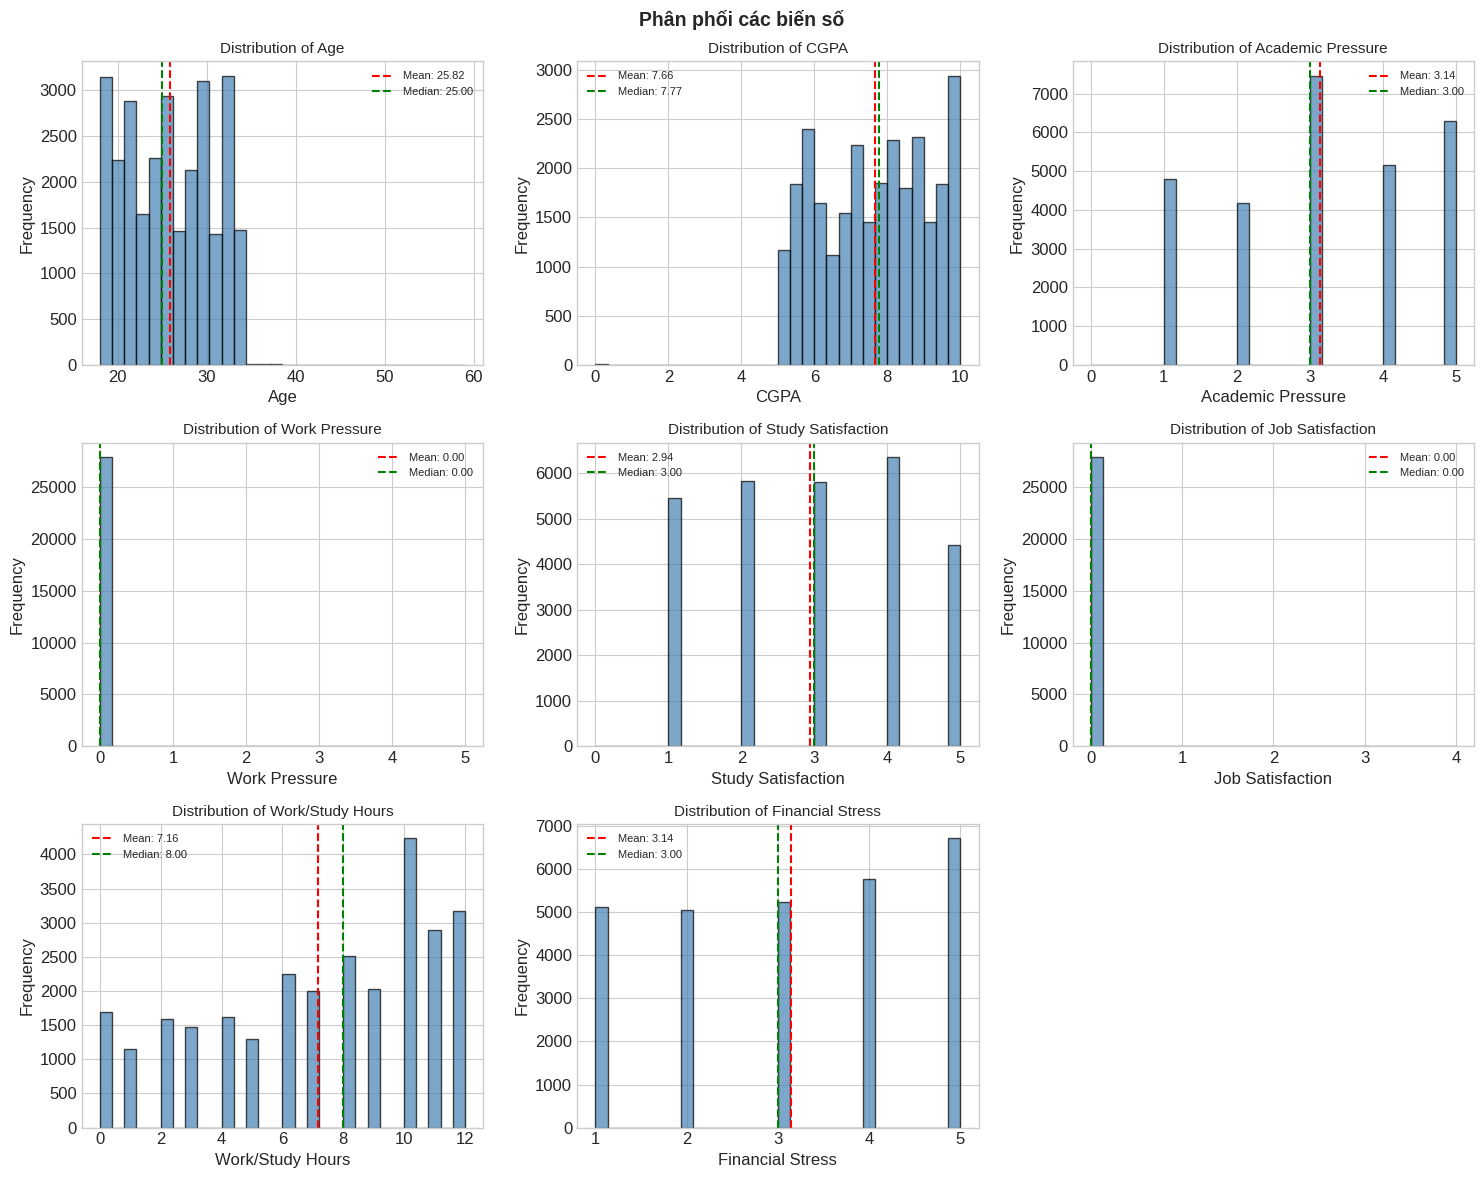


📊 Phân phối các biến categorical:


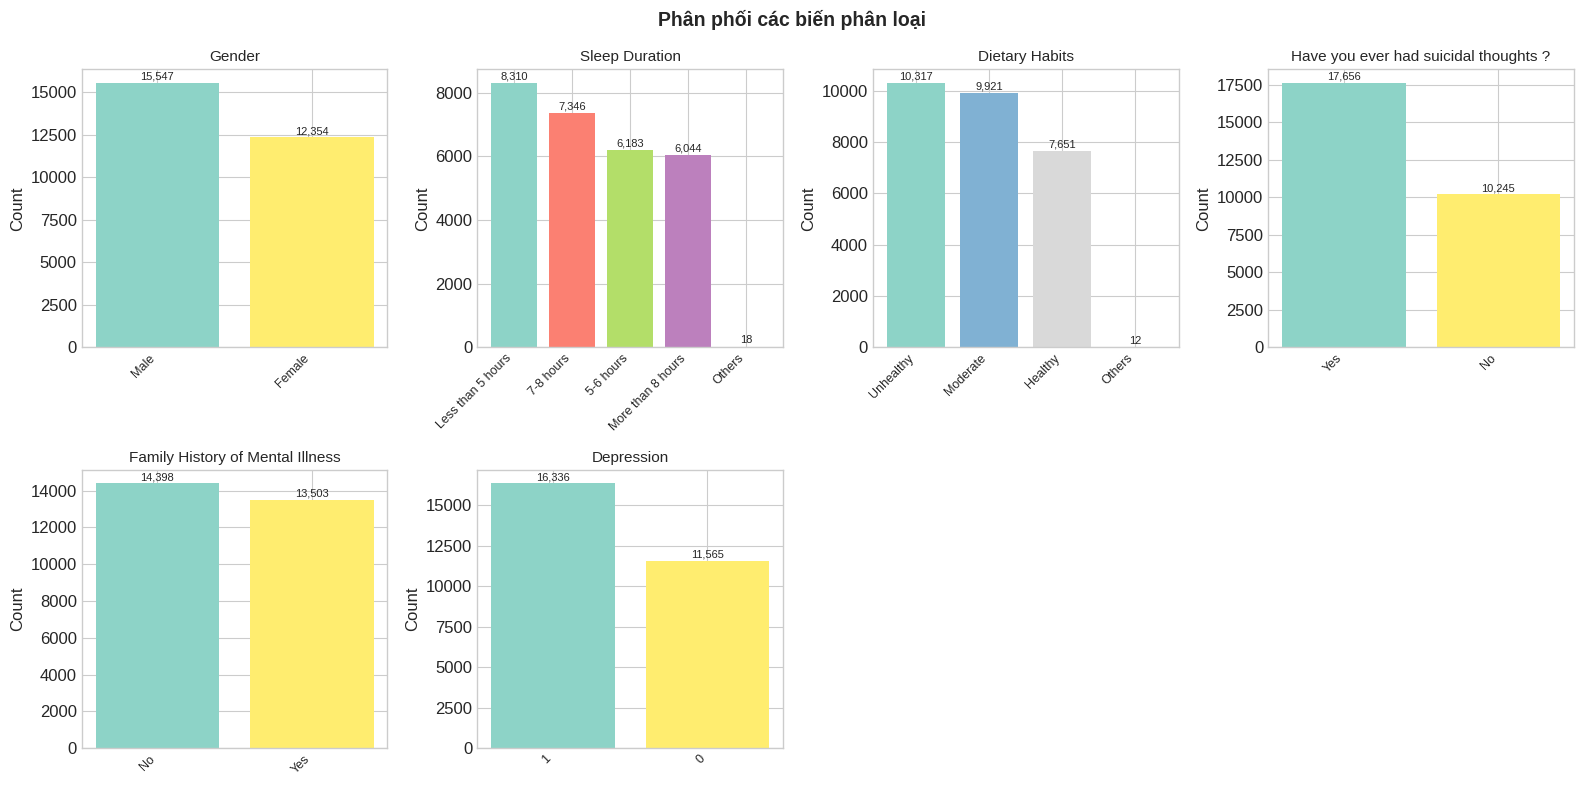

In [61]:
# ============================================
# CELL 10: Phân tích phân phối
# ============================================

print("\n" + "="*60)
print("2.8 PHÂN TÍCH PHÂN PHỐI DỮ LIỆU")
print("="*60)

# Numerical variables
# Numerical variables - ensure they are numeric after preprocessing
numerical_cols = ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure',
                  'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                  'Financial Stress']

# Ensure all are numeric
for col in numerical_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if col in df_clean.columns:
        ax = axes[idx]
        
        # Histogram với KDE
        df_clean[col].hist(bins=30, ax=ax, alpha=0.7, color='steelblue', edgecolor='black')
        ax.set_title(f'Distribution of {col}', fontsize=11)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
        # Thêm thống kê
        mean_val = df_clean[col].mean()
        median_val = df_clean[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        ax.legend(fontsize=8)

# Ẩn subplot thừa
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Phân phối các biến số', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Categorical variables
print("\n📊 Phân phối các biến categorical:")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

categorical_for_plot = ['Gender', 'Sleep Duration', 'Dietary Habits', 
                        'Have you ever had suicidal thoughts ?',
                        'Family History of Mental Illness', 'Depression']

for idx, col in enumerate(categorical_for_plot):
    if col in df_clean.columns:
        ax = axes[idx]
        value_counts = df_clean[col].value_counts()
        
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
        ax.set_title(col, fontsize=11)
        ax.set_ylabel('Count')
        
        # Thêm số liệu trên cột
        for bar, val in zip(bars, value_counts.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                   f'{val:,}', ha='center', va='bottom', fontsize=8)

# Ẩn subplot thừa
for idx in range(len(categorical_for_plot), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Phân phối các biến phân loại', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


2.9 PHÂN TÍCH TƯƠNG QUAN


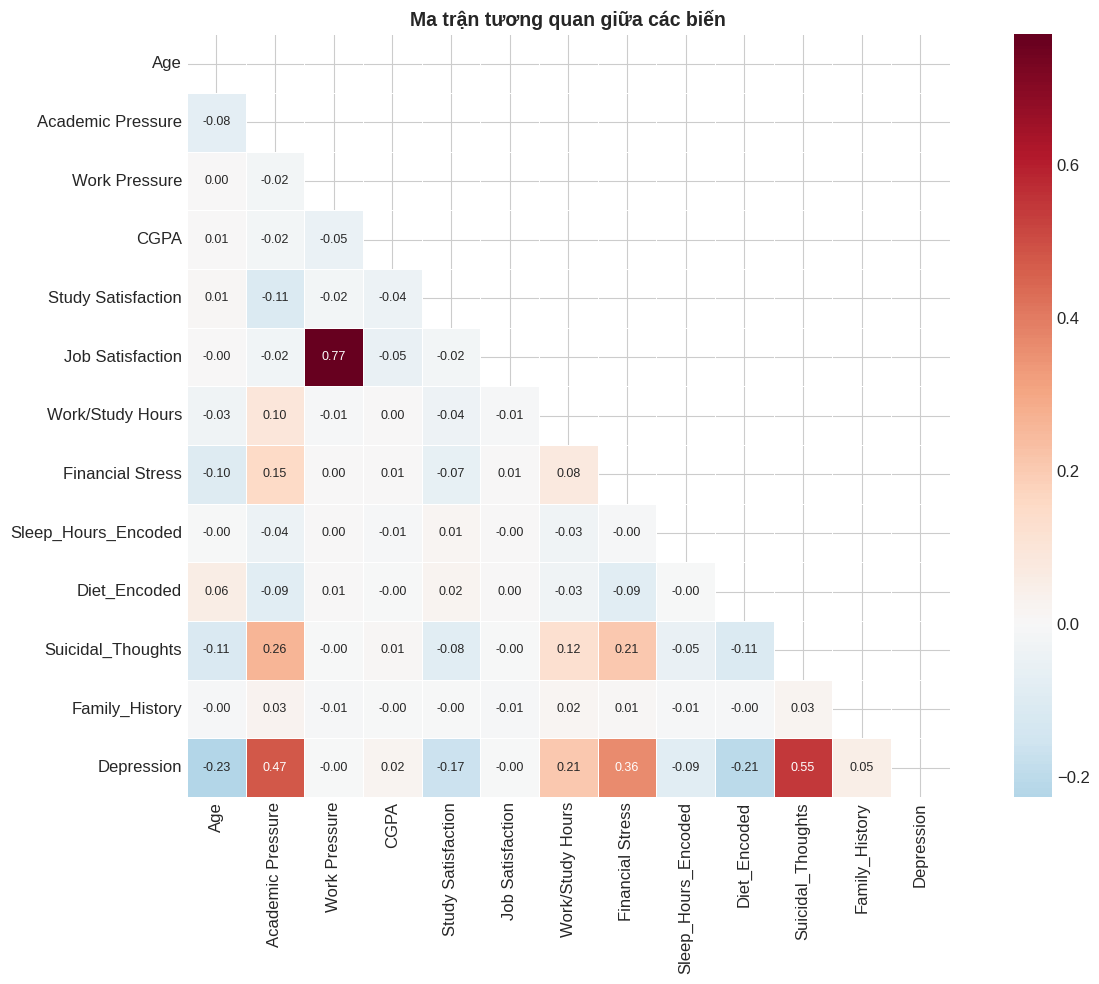


📊 Tương quan với biến Depression (xếp theo |r|):


,Variable,Correlation,|Correlation|
0,Suicidal_Thoughts,0.546277,0.546277
1,Academic Pressure,0.474835,0.474835
2,Financial Stress,0.363574,0.363574
3,Age,-0.226422,0.226422
4,Work/Study Hours,0.208563,0.208563
5,Diet_Encoded,-0.206689,0.206689
6,Study Satisfaction,-0.167971,0.167971
7,Sleep_Hours_Encoded,-0.087085,0.087085
8,Family_History,0.053430,0.053430
9,CGPA,0.022210,0.022210


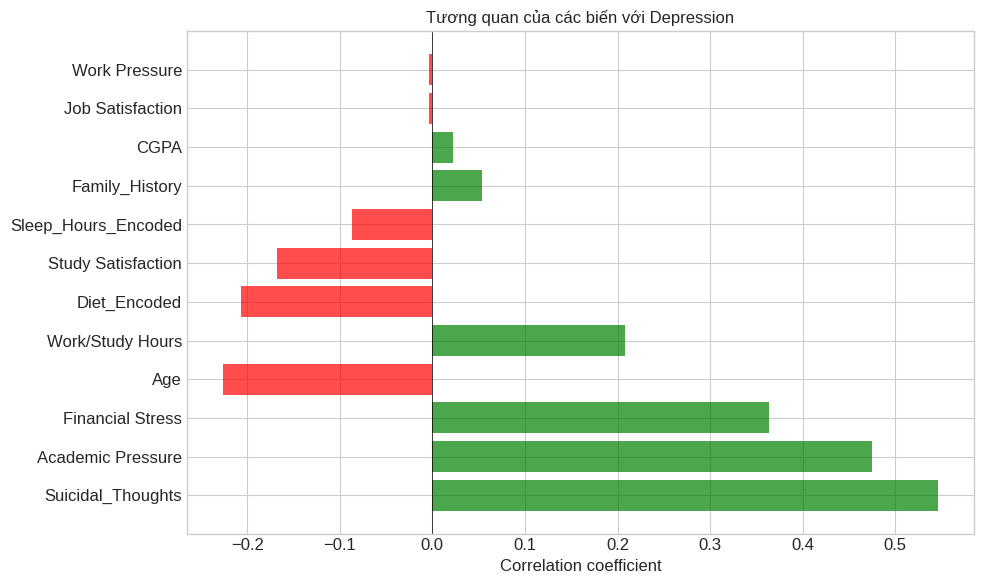

In [62]:
# ============================================
# CELL 11: Correlation Analysis
# ============================================

print("\n" + "="*60)
print("2.9 PHÂN TÍCH TƯƠNG QUAN")
print("="*60)

# Chọn các biến số cho correlation matrix
corr_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
             'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
             'Financial Stress', 'Sleep_Hours_Encoded', 'Diet_Encoded',
             'Suicidal_Thoughts', 'Family_History', 'Depression']

corr_matrix = df_clean[corr_cols].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5, ax=ax,
            annot_kws={'size': 9})
ax.set_title('Ma trận tương quan giữa các biến', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation với biến target
print("\n📊 Tương quan với biến Depression (xếp theo |r|):")
target_corr = corr_matrix['Depression'].drop('Depression').abs().sort_values(ascending=False)
target_corr_df = pd.DataFrame({
    'Variable': target_corr.index,
    'Correlation': corr_matrix['Depression'].drop('Depression')[target_corr.index].values,
    '|Correlation|': target_corr.values
})
display(target_corr_df)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr_df['Correlation']]
ax.barh(target_corr_df['Variable'], target_corr_df['Correlation'], color=colors, alpha=0.7)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xlabel('Correlation coefficient')
ax.set_title('Tương quan của các biến với Depression', fontsize=12)
plt.tight_layout()
plt.show()

3.1 TỔNG THỂ

--------------------------------------------------
Q1 & Q2: Tỷ lệ trầm cảm trong sinh viên là bao nhiêu và phân bố thế nào?
--------------------------------------------------

📊 Tỷ lệ trầm cảm tổng thể:
   - Không trầm cảm (0): 11,565 (41.5%)
   - Có trầm cảm (1): 16,336 (58.5%)


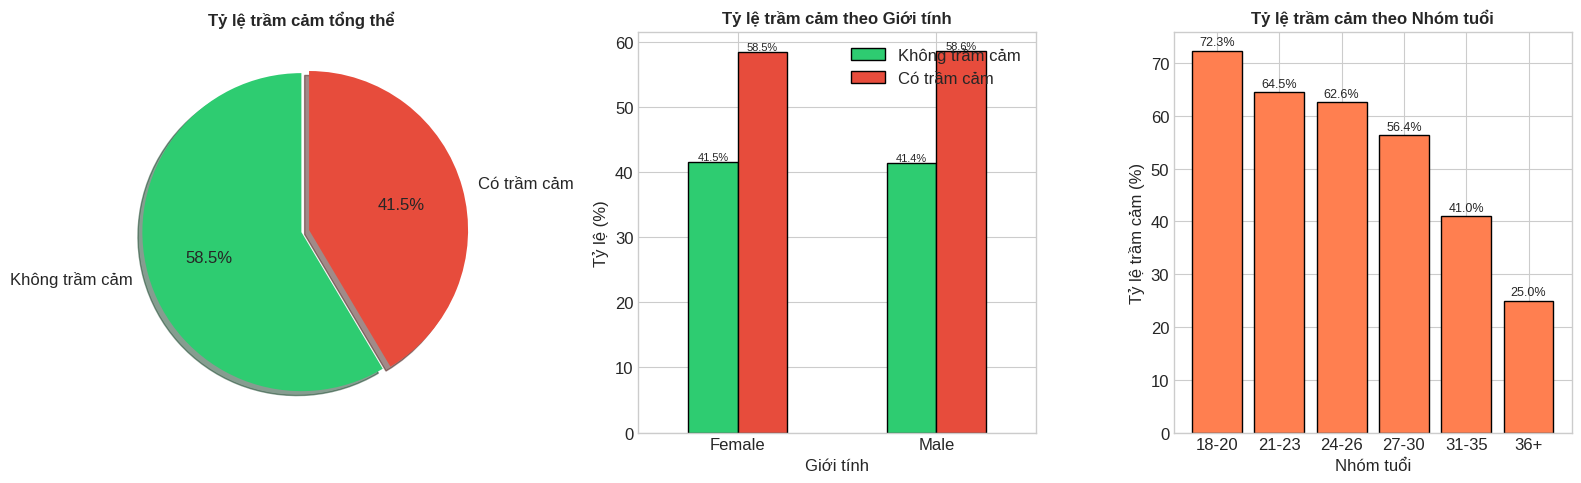


📈 Kiểm định Chi-square: Mối quan hệ giữa Giới tính và Trầm cảm
   Chi-square statistic: 0.0827
   p-value: 0.7737
   Kết luận: Không có mối quan hệ có ý nghĩa thống kê

📊 Thống kê mô tả theo tình trạng trầm cảm:


,Age,Academic Pressure,CGPA,Study Satisfaction,Financial Stress,Work/Study Hours
Không trầm cảm,27.14,2.36,7.62,3.22,2.52,6.24
Có trầm cảm,24.89,3.69,7.68,2.75,3.58,7.81


In [63]:
# ============================================
# CELL 12: Q1 & Q2 - Tỷ lệ và phân bố trầm cảm
# ============================================

print("="*70)
print("3.1 TỔNG THỂ")
print("="*70)
print("\n" + "-"*50)
print("Q1 & Q2: Tỷ lệ trầm cảm trong sinh viên là bao nhiêu và phân bố thế nào?")
print("-"*50)

# Tỷ lệ tổng thể
depression_counts = df_clean['Depression'].value_counts()
depression_pct = df_clean['Depression'].value_counts(normalize=True) * 100

print(f"\n📊 Tỷ lệ trầm cảm tổng thể:")
print(f"   - Không trầm cảm (0): {depression_counts[0]:,} ({depression_pct[0]:.1f}%)")
print(f"   - Có trầm cảm (1): {depression_counts[1]:,} ({depression_pct[1]:.1f}%)")

# Visualization - Pie chart và Bar chart
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0, 0.05)
axes[0].pie(depression_pct, labels=['Không trầm cảm', 'Có trầm cảm'],
           autopct='%1.1f%%', explode=explode, colors=colors,
           shadow=True, startangle=90)
axes[0].set_title('Tỷ lệ trầm cảm tổng thể', fontsize=12, fontweight='bold')

# Phân bố theo giới tính
gender_dep = pd.crosstab(df_clean['Gender'], df_clean['Depression'], normalize='index') * 100
gender_dep.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Tỷ lệ trầm cảm theo Giới tính', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Giới tính')
axes[1].set_ylabel('Tỷ lệ (%)')
axes[1].legend(['Không trầm cảm', 'Có trầm cảm'], loc='upper right')
axes[1].tick_params(axis='x', rotation=0)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', fontsize=8)

# Phân bố theo độ tuổi
age_bins = [17, 20, 23, 26, 30, 35, 40]
age_labels = ['18-20', '21-23', '24-26', '27-30', '31-35', '36+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels)

age_dep = df_clean.groupby('Age_Group')['Depression'].mean() * 100
axes[2].bar(age_dep.index, age_dep.values, color='coral', edgecolor='black')
axes[2].set_title('Tỷ lệ trầm cảm theo Nhóm tuổi', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Nhóm tuổi')
axes[2].set_ylabel('Tỷ lệ trầm cảm (%)')
for i, v in enumerate(age_dep.values):
    axes[2].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Chi-square test for gender
print("\n📈 Kiểm định Chi-square: Mối quan hệ giữa Giới tính và Trầm cảm")
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['Depression'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   p-value: {p_value:.4f}")
print(f"   Kết luận: {'Có mối quan hệ có ý nghĩa thống kê' if p_value < 0.05 else 'Không có mối quan hệ có ý nghĩa thống kê'}")

# Summary statistics by depression status
print("\n📊 Thống kê mô tả theo tình trạng trầm cảm:")
summary_by_dep = df_clean.groupby('Depression')[['Age', 'Academic Pressure', 'CGPA', 
                                                   'Study Satisfaction', 'Financial Stress',
                                                   'Work/Study Hours']].mean().round(2)
summary_by_dep.index = ['Không trầm cảm', 'Có trầm cảm']
display(summary_by_dep)


3.2 ÁP LỰC HỌC TẬP VÀ HÀI LÒNG

--------------------------------------------------
Q3: Academic Pressure có thực sự liên quan mạnh đến trầm cảm?
--------------------------------------------------

📊 Point-biserial correlation:
   r = 0.4748, p-value = 0.0000e+00
   Giải thích: Tương quan mạnh

📊 Tỷ lệ trầm cảm theo mức Academic Pressure:


,Depression Rate,Count,Depression Rate %
Academic Pressure,,,
0.0,0.444,9,44.4
1.0,0.194,4801,19.4
2.0,0.375,4178,37.5
3.0,0.602,7462,60.2
4.0,0.761,5155,76.1
5.0,0.861,6296,86.1


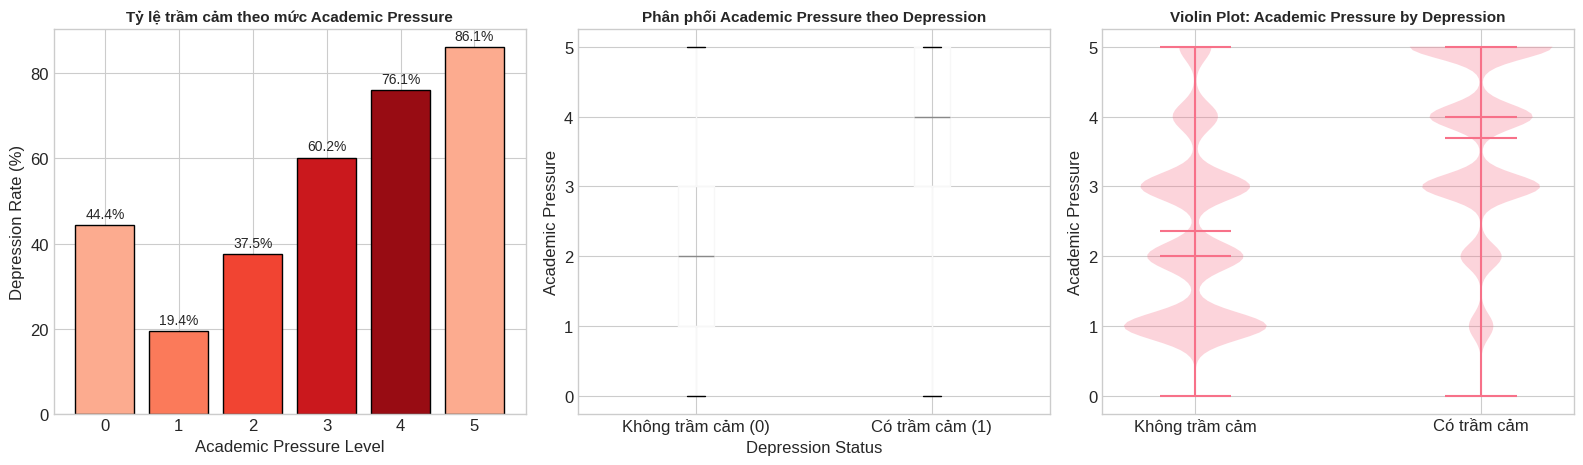


📊 Odds Ratio Analysis:
   Odds (High Pressure): 4.4373
   Odds (Low Pressure): 0.3858
   Odds Ratio: 11.50
   ➤ Sinh viên có áp lực cao (4-5) có nguy cơ trầm cảm cao gấp 11.5 lần so với sinh viên có áp lực thấp (1-2)


In [64]:
# ============================================
# CELL 13: Q3 - Academic Pressure và Trầm cảm
# ============================================

print("\n" + "="*70)
print("3.2 ÁP LỰC HỌC TẬP VÀ HÀI LÒNG")
print("="*70)
print("\n" + "-"*50)
print("Q3: Academic Pressure có thực sự liên quan mạnh đến trầm cảm?")
print("-"*50)

# 1. Point-biserial correlation
r_pb, p_pb = pointbiserialr(df_clean['Depression'], df_clean['Academic Pressure'])
print(f"\n📊 Point-biserial correlation:")
print(f"   r = {r_pb:.4f}, p-value = {p_pb:.4e}")
print(f"   Giải thích: {'Tương quan mạnh' if abs(r_pb) > 0.3 else 'Tương quan trung bình' if abs(r_pb) > 0.2 else 'Tương quan yếu'}")

# 2. Tỷ lệ trầm cảm theo mức Academic Pressure
pressure_dep = df_clean.groupby('Academic Pressure').agg({
    'Depression': ['mean', 'count']
}).round(3)
pressure_dep.columns = ['Depression Rate', 'Count']
pressure_dep['Depression Rate %'] = (pressure_dep['Depression Rate'] * 100).round(1)

print("\n📊 Tỷ lệ trầm cảm theo mức Academic Pressure:")
display(pressure_dep)

# 3. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar chart - Depression rate by Academic Pressure
ax1 = axes[0]
colors_grad = plt.cm.Reds(np.linspace(0.3, 0.9, 5))
bars = ax1.bar(pressure_dep.index, pressure_dep['Depression Rate %'], 
               color=colors_grad, edgecolor='black')
ax1.set_xlabel('Academic Pressure Level')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Tỷ lệ trầm cảm theo mức Academic Pressure', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Box plot
ax2 = axes[1]
df_clean.boxplot(column='Academic Pressure', by='Depression', ax=ax2)
ax2.set_xlabel('Depression Status')
ax2.set_ylabel('Academic Pressure')
ax2.set_title('Phân phối Academic Pressure theo Depression', fontsize=11, fontweight='bold')
ax2.set_xticklabels(['Không trầm cảm (0)', 'Có trầm cảm (1)'])
plt.suptitle('')

# Violin plot
ax3 = axes[2]
parts = ax3.violinplot([df_clean[df_clean['Depression']==0]['Academic Pressure'].dropna(),
                        df_clean[df_clean['Depression']==1]['Academic Pressure'].dropna()],
                       positions=[0, 1], showmeans=True, showmedians=True)
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['Không trầm cảm', 'Có trầm cảm'])
ax3.set_ylabel('Academic Pressure')
ax3.set_title('Violin Plot: Academic Pressure by Depression', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Odds Ratio tính toán
print("\n📊 Odds Ratio Analysis:")
# High pressure (4-5) vs Low pressure (1-2)
high_pressure = df_clean[df_clean['Academic Pressure'] >= 4]
low_pressure = df_clean[df_clean['Academic Pressure'] <= 2]

high_dep = high_pressure['Depression'].sum()
high_no_dep = len(high_pressure) - high_dep
low_dep = low_pressure['Depression'].sum()
low_no_dep = len(low_pressure) - low_dep

odds_high = high_dep / high_no_dep if high_no_dep > 0 else np.inf
odds_low = low_dep / low_no_dep if low_no_dep > 0 else np.inf
odds_ratio = odds_high / odds_low if odds_low > 0 else np.inf

print(f"   Odds (High Pressure): {odds_high:.4f}")
print(f"   Odds (Low Pressure): {odds_low:.4f}")
print(f"   Odds Ratio: {odds_ratio:.2f}")
print(f"   ➤ Sinh viên có áp lực cao (4-5) có nguy cơ trầm cảm cao gấp {odds_ratio:.1f} lần so với sinh viên có áp lực thấp (1-2)")


--------------------------------------------------
Q4: Study Satisfaction có làm giảm tác động tiêu cực của Academic Pressure không?
--------------------------------------------------

📊 Tỷ lệ trầm cảm (%) theo Academic Pressure và Study Satisfaction:


Satisfaction_Group,Low (1-2),Medium (3),High (4-5)
Academic Pressure,,,
0.0,0.0,100.0,NaN
1.0,22.0,20.0,16.6
2.0,47.4,38.9,31.0
3.0,67.9,61.1,52.5
4.0,82.3,77.4,67.4
5.0,89.4,87.4,80.0


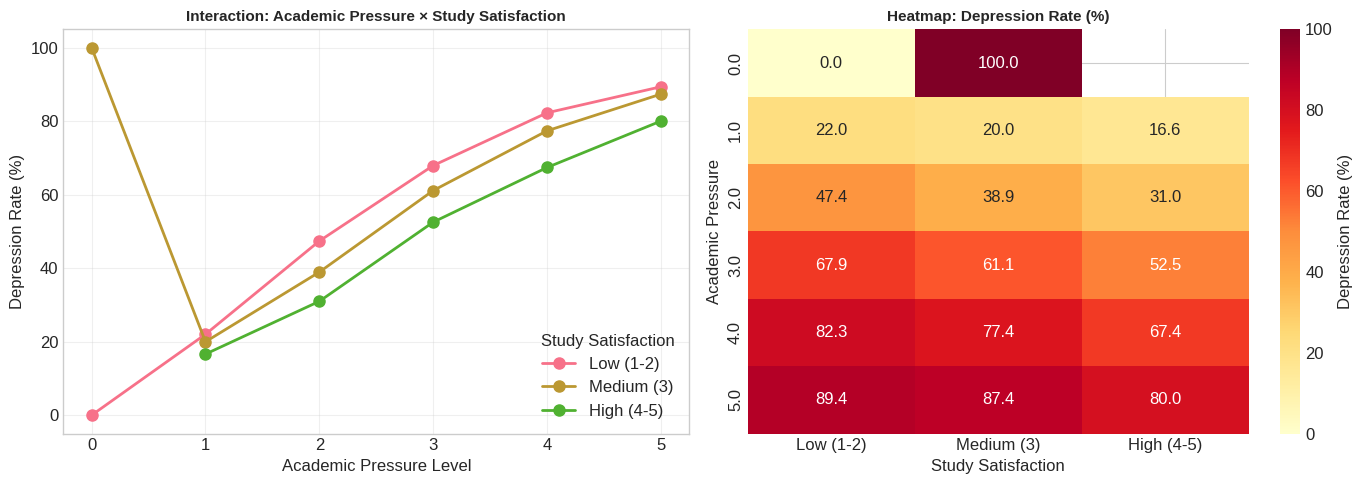


📈 Logistic Regression với Interaction Term:
                       Coef.  Std.Err.          z          P>|z|    [0.025  \
const              -1.759547  0.087233 -20.170753   1.769249e-90 -1.930519   
Academic Pressure   0.925495  0.027530  33.617288  9.378004e-248  0.871536   
Study Satisfaction -0.113873  0.026553  -4.288512   1.798739e-05 -0.165916   
AP_SS_Interaction  -0.039087  0.008308  -4.704504   2.544845e-06 -0.055371   

                      0.975]  
const              -1.588574  
Academic Pressure   0.979453  
Study Satisfaction -0.061830  
AP_SS_Interaction  -0.022803  

📝 Giải thích:
   - Nếu coefficient của Interaction term có ý nghĩa thống kê (p < 0.05),
     thì Study Satisfaction có tác động điều tiết lên mối quan hệ
     giữa Academic Pressure và Depression.
   - Interaction coefficient: -0.0391
   - p-value: 0.0000
   ➤ KẾT LUẬN: Study Satisfaction CÓ làm giảm tác động tiêu cực của Academic Pressure


In [65]:
# ============================================
# CELL 14: Q4 - Study Satisfaction điều tiết Academic Pressure
# ============================================

print("\n" + "-"*50)
print("Q4: Study Satisfaction có làm giảm tác động tiêu cực của Academic Pressure không?")
print("-"*50)

# 1. Phân tích interaction effect
# Chia nhóm Study Satisfaction
df_clean['Satisfaction_Group'] = pd.cut(df_clean['Study Satisfaction'], 
                                        bins=[0, 2, 3, 5], 
                                        labels=['Low (1-2)', 'Medium (3)', 'High (4-5)'])

# Tạo bảng cross-tab
interaction_table = df_clean.groupby(['Academic Pressure', 'Satisfaction_Group'])['Depression'].mean() * 100
interaction_pivot = interaction_table.unstack()

print("\n📊 Tỷ lệ trầm cảm (%) theo Academic Pressure và Study Satisfaction:")
display(interaction_pivot.round(1))

# 2. Visualization - Interaction Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line plot
ax1 = axes[0]
for col in interaction_pivot.columns:
    ax1.plot(interaction_pivot.index, interaction_pivot[col], marker='o', 
             linewidth=2, markersize=8, label=col)
ax1.set_xlabel('Academic Pressure Level')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Interaction: Academic Pressure × Study Satisfaction', fontsize=11, fontweight='bold')
ax1.legend(title='Study Satisfaction')
ax1.grid(True, alpha=0.3)

# Heatmap
ax2 = axes[1]
sns.heatmap(interaction_pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Depression Rate (%)'})
ax2.set_title('Heatmap: Depression Rate (%)', fontsize=11, fontweight='bold')
ax2.set_xlabel('Study Satisfaction')
ax2.set_ylabel('Academic Pressure')

plt.tight_layout()
plt.show()

# 3. Logistic Regression để kiểm tra interaction
print("\n📈 Logistic Regression với Interaction Term:")

# Chuẩn bị dữ liệu
df_model = df_clean[['Academic Pressure', 'Study Satisfaction', 'Depression']].dropna()
df_model['AP_SS_Interaction'] = df_model['Academic Pressure'] * df_model['Study Satisfaction']

X = df_model[['Academic Pressure', 'Study Satisfaction', 'AP_SS_Interaction']]
X = sm.add_constant(X)
y = df_model['Depression']

# Fit model
model = sm.Logit(y, X).fit(disp=0)
print(model.summary2().tables[1])

# Giải thích
print("\n📝 Giải thích:")
print("   - Nếu coefficient của Interaction term có ý nghĩa thống kê (p < 0.05),")
print("     thì Study Satisfaction có tác động điều tiết lên mối quan hệ")
print("     giữa Academic Pressure và Depression.")
print(f"   - Interaction coefficient: {model.params['AP_SS_Interaction']:.4f}")
print(f"   - p-value: {model.pvalues['AP_SS_Interaction']:.4f}")

if model.pvalues['AP_SS_Interaction'] < 0.05:
    if model.params['AP_SS_Interaction'] < 0:
        print("   ➤ KẾT LUẬN: Study Satisfaction CÓ làm giảm tác động tiêu cực của Academic Pressure")
    else:
        print("   ➤ KẾT LUẬN: Study Satisfaction làm TĂNG thêm tác động tiêu cực (unexpected)")
else:
    print("   ➤ KẾT LUẬN: Không có bằng chứng rõ ràng về tác động điều tiết")


--------------------------------------------------
Q5: Có tồn tại ngưỡng Academic Pressure làm nguy cơ trầm cảm tăng đột biến?
--------------------------------------------------

📊 Depression Rate và Rate of Change theo Academic Pressure:


,Pressure Level,Depression Rate (%),Change from Previous
0,0.0,44.444444,-
1,1.0,19.412622,-25.03%
2,2.0,37.482049,18.07%
3,3.0,60.158135,22.68%
4,4.0,76.139670,15.98%
5,5.0,86.086404,9.95%



🔍 Ngưỡng tiềm năng phát hiện:
   - Mức tăng đột biến lớn nhất: từ level 2.0 → 3.0
   - Mức tăng: 22.68% points


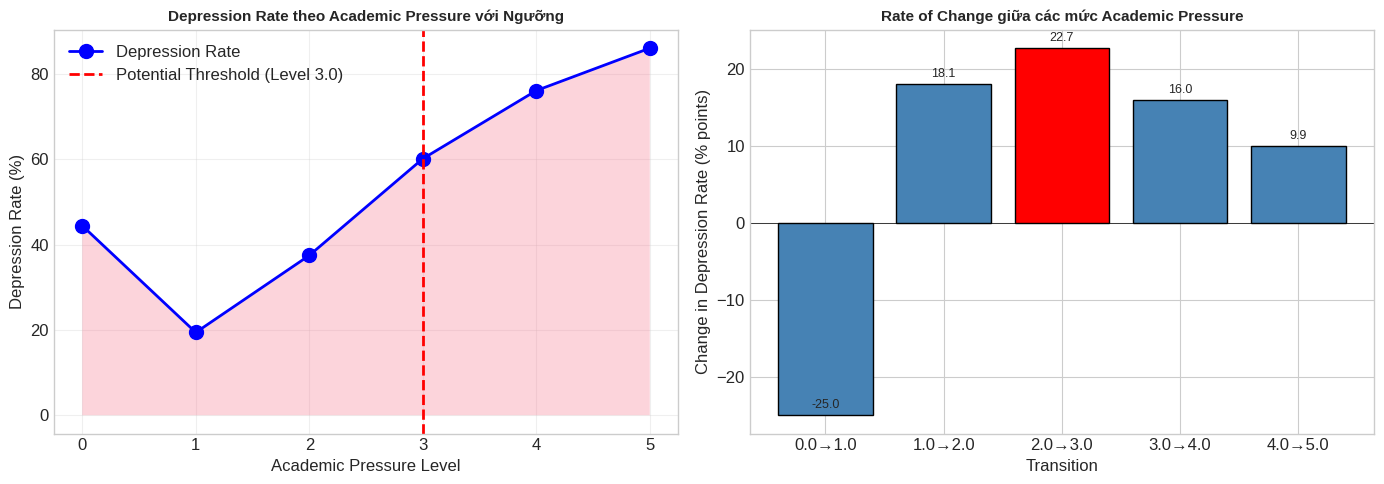


📈 Kiểm định thống kê tại ngưỡng:
   Tỷ lệ trầm cảm trước ngưỡng (<3.0): 27.8%
   Tỷ lệ trầm cảm tại và sau ngưỡng (≥3.0): 73.1%
   Z-statistic: 71.7884
   p-value: 0.0000e+00

   ➤ CÓ bằng chứng thống kê về sự tăng đột biến tại ngưỡng 3.0


In [66]:
# ============================================
# CELL 15: Q5 - Ngưỡng Academic Pressure
# ============================================

print("\n" + "-"*50)
print("Q5: Có tồn tại ngưỡng Academic Pressure làm nguy cơ trầm cảm tăng đột biến?")
print("-"*50)

# 1. Tính depression rate và rate of change
pressure_levels = sorted(df_clean['Academic Pressure'].unique())
dep_rates = []
for level in pressure_levels:
    rate = df_clean[df_clean['Academic Pressure'] == level]['Depression'].mean() * 100
    dep_rates.append(rate)

# Tính rate of change (gradient)
gradients = np.diff(dep_rates)

print("\n📊 Depression Rate và Rate of Change theo Academic Pressure:")
threshold_df = pd.DataFrame({
    'Pressure Level': pressure_levels,
    'Depression Rate (%)': dep_rates,
    'Change from Previous': ['-'] + [f'{g:.2f}%' for g in gradients]
})
display(threshold_df)

# 2. Tìm điểm có gradient lớn nhất (potential threshold)
max_gradient_idx = np.argmax(gradients)
threshold_level = pressure_levels[max_gradient_idx + 1]
max_gradient = gradients[max_gradient_idx]

print(f"\n🔍 Ngưỡng tiềm năng phát hiện:")
print(f"   - Mức tăng đột biến lớn nhất: từ level {pressure_levels[max_gradient_idx]} → {threshold_level}")
print(f"   - Mức tăng: {max_gradient:.2f}% points")

# 3. Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Line plot with gradient visualization
ax1 = axes[0]
ax1.plot(pressure_levels, dep_rates, 'b-o', linewidth=2, markersize=10, label='Depression Rate')
ax1.fill_between(pressure_levels, dep_rates, alpha=0.3)

# Highlight threshold
ax1.axvline(threshold_level, color='red', linestyle='--', linewidth=2, 
            label=f'Potential Threshold (Level {threshold_level})')
ax1.set_xlabel('Academic Pressure Level')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Depression Rate theo Academic Pressure với Ngưỡng', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bar chart of gradients
ax2 = axes[1]
transition_labels = [f'{pressure_levels[i]}→{pressure_levels[i+1]}' for i in range(len(gradients))]
colors = ['red' if i == max_gradient_idx else 'steelblue' for i in range(len(gradients))]
bars = ax2.bar(transition_labels, gradients, color=colors, edgecolor='black')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlabel('Transition')
ax2.set_ylabel('Change in Depression Rate (% points)')
ax2.set_title('Rate of Change giữa các mức Academic Pressure', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Statistical test - So sánh trước và sau ngưỡng
print("\n📈 Kiểm định thống kê tại ngưỡng:")
before_threshold = df_clean[df_clean['Academic Pressure'] < threshold_level]['Depression']
after_threshold = df_clean[df_clean['Academic Pressure'] >= threshold_level]['Depression']

# Two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest

count = np.array([after_threshold.sum(), before_threshold.sum()])
nobs = np.array([len(after_threshold), len(before_threshold)])
z_stat, p_val = proportions_ztest(count, nobs, alternative='larger')

print(f"   Tỷ lệ trầm cảm trước ngưỡng (<{threshold_level}): {before_threshold.mean()*100:.1f}%")
print(f"   Tỷ lệ trầm cảm tại và sau ngưỡng (≥{threshold_level}): {after_threshold.mean()*100:.1f}%")
print(f"   Z-statistic: {z_stat:.4f}")
print(f"   p-value: {p_val:.4e}")
print(f"\n   ➤ {'CÓ' if p_val < 0.05 else 'KHÔNG có'} bằng chứng thống kê về sự tăng đột biến tại ngưỡng {threshold_level}")


3.3 THÀNH TÍCH HỌC TẬP (COUNTER-INTUITIVE INSIGHT)

--------------------------------------------------
Q6: CGPA có mối quan hệ tuyến tính với trầm cảm không?
--------------------------------------------------

📊 Correlation Analysis:
   Pearson r: 0.0222 (p = 2.0706e-04)
   Spearman ρ: 0.0218 (p = 2.7362e-04)

📊 Tỷ lệ trầm cảm theo nhóm CGPA:


,Depression Rate,Count,Depression %
CGPA_Group,,,
<5,NaN,0,NaN
5-6,0.557855,5557,55.8
6-7,0.596407,4175,59.6
7-8,0.557225,5592,55.7
8-9,0.637468,6336,63.7
9+,0.575578,6232,57.6


posx and posy should be finite values
posx and posy should be finite values


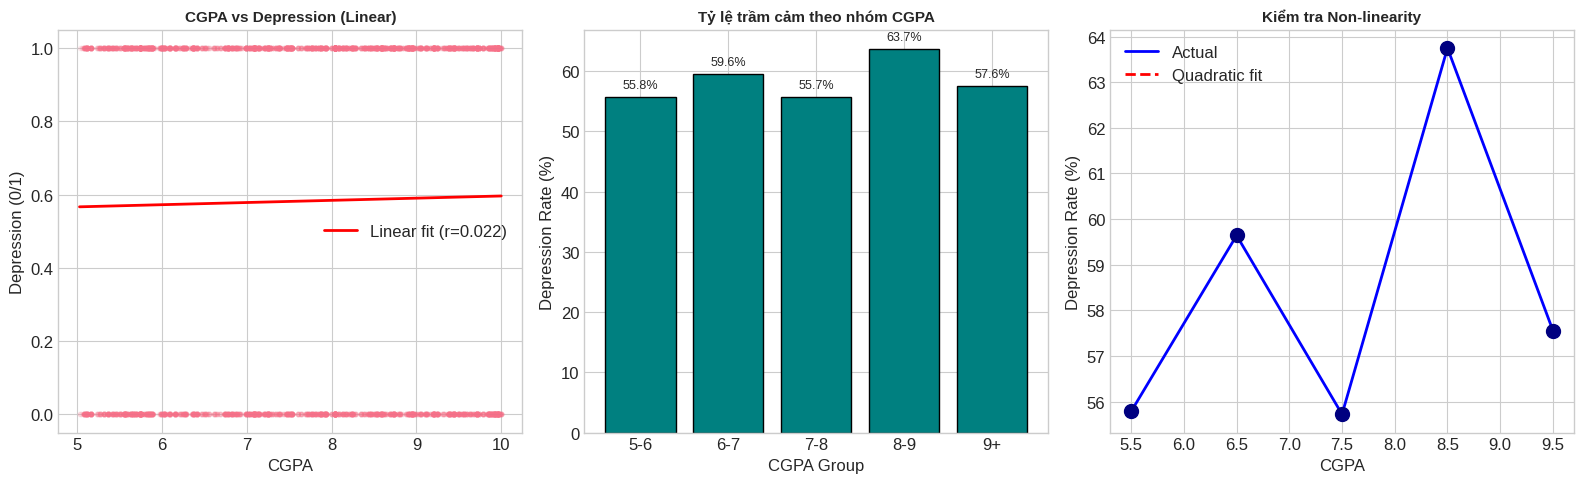


📈 Kiểm tra tính phi tuyến:
   R² Linear:    0.000493
   R² Quadratic: 0.001033
   R² Cubic:     0.001319

   ➤ Quadratic improvement over linear: 109.4%
   ➤ Mối quan hệ có vẻ PHI TUYẾN


In [67]:

print("\n" + "="*70)
print("3.3 THÀNH TÍCH HỌC TẬP (COUNTER-INTUITIVE INSIGHT)")
print("="*70)
print("\n" + "-"*50)
print("Q6: CGPA có mối quan hệ tuyến tính với trầm cảm không?")
print("-"*50)

# 1. Correlation analysis
r_pearson, p_pearson = pearsonr(df_clean['CGPA'], df_clean['Depression'])
r_spearman, p_spearman = spearmanr(df_clean['CGPA'], df_clean['Depression'])

print(f"\n📊 Correlation Analysis:")
print(f"   Pearson r: {r_pearson:.4f} (p = {p_pearson:.4e})")
print(f"   Spearman ρ: {r_spearman:.4f} (p = {p_spearman:.4e})")

# 2. Phân chia CGPA thành các nhóm
cgpa_bins = [0, 5, 6, 7, 8, 9, 11]
cgpa_labels = ['<5', '5-6', '6-7', '7-8', '8-9', '9+']
df_clean['CGPA_Group'] = pd.cut(df_clean['CGPA'], bins=cgpa_bins, labels=cgpa_labels)

cgpa_dep = df_clean.groupby('CGPA_Group').agg({
    'Depression': ['mean', 'count']
})
cgpa_dep.columns = ['Depression Rate', 'Count']
cgpa_dep['Depression %'] = (cgpa_dep['Depression Rate'] * 100).round(1)

print("\n📊 Tỷ lệ trầm cảm theo nhóm CGPA:")
display(cgpa_dep)

# 3. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Scatter plot với regression line
ax1 = axes[0]
# Sample để không quá đông
sample_df = df_clean.sample(min(5000, len(df_clean)), random_state=42)
ax1.scatter(sample_df['CGPA'], sample_df['Depression'], alpha=0.1, s=10)
# Add trendline
z = np.polyfit(sample_df['CGPA'].dropna(), sample_df['Depression'].dropna(), 1)
p = np.poly1d(z)
x_line = np.linspace(sample_df['CGPA'].min(), sample_df['CGPA'].max(), 100)
ax1.plot(x_line, p(x_line), 'r-', linewidth=2, label=f'Linear fit (r={r_pearson:.3f})')
ax1.set_xlabel('CGPA')
ax1.set_ylabel('Depression (0/1)')
ax1.set_title('CGPA vs Depression (Linear)', fontsize=11, fontweight='bold')
ax1.legend()

# Bar chart - Depression rate by CGPA group
ax2 = axes[1]
bars = ax2.bar(cgpa_dep.index, cgpa_dep['Depression %'], color='teal', edgecolor='black')
ax2.set_xlabel('CGPA Group')
ax2.set_ylabel('Depression Rate (%)')
ax2.set_title('Tỷ lệ trầm cảm theo nhóm CGPA', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Kiểm tra non-linearity bằng polynomial fit
ax3 = axes[2]
cgpa_midpoints = [4, 5.5, 6.5, 7.5, 8.5, 9.5]
dep_rates = cgpa_dep['Depression Rate'].values
ax3.scatter(cgpa_midpoints, dep_rates * 100, s=100, color='navy', zorder=5)
ax3.plot(cgpa_midpoints, dep_rates * 100, 'b-', linewidth=2, label='Actual')

# Polynomial fit degree 2
z2 = np.polyfit(cgpa_midpoints, dep_rates * 100, 2)
p2 = np.poly1d(z2)
x_smooth = np.linspace(min(cgpa_midpoints), max(cgpa_midpoints), 100)
ax3.plot(x_smooth, p2(x_smooth), 'r--', linewidth=2, label='Quadratic fit')

ax3.set_xlabel('CGPA')
ax3.set_ylabel('Depression Rate (%)')
ax3.set_title('Kiểm tra Non-linearity', fontsize=11, fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

# 4. Test for non-linearity
print("\n📈 Kiểm tra tính phi tuyến:")
# Polynomial regression comparison
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_cgpa = df_clean[['CGPA']].dropna()
y_dep = df_clean.loc[X_cgpa.index, 'Depression']

# Linear
lr_linear = LinearRegression().fit(X_cgpa, y_dep)
r2_linear = r2_score(y_dep, lr_linear.predict(X_cgpa))

# Quadratic
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_cgpa)
lr_poly2 = LinearRegression().fit(X_poly2, y_dep)
r2_poly2 = r2_score(y_dep, lr_poly2.predict(X_poly2))

# Cubic
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_cgpa)
lr_poly3 = LinearRegression().fit(X_poly3, y_dep)
r2_poly3 = r2_score(y_dep, lr_poly3.predict(X_poly3))

print(f"   R² Linear:    {r2_linear:.6f}")
print(f"   R² Quadratic: {r2_poly2:.6f}")
print(f"   R² Cubic:     {r2_poly3:.6f}")

improvement = (r2_poly2 - r2_linear) / r2_linear * 100 if r2_linear != 0 else 0
print(f"\n   ➤ Quadratic improvement over linear: {improvement:.1f}%")
print(f"   ➤ Mối quan hệ có vẻ {'PHI TUYẾN' if improvement > 10 else 'GẦN NHƯ TUYẾN TÍNH'}")



--------------------------------------------------
Q7: 'High achievers but unhappy' có thực sự tồn tại?
--------------------------------------------------

📊 Tổng quan:
   High Achievers (CGPA ≥ 8.0): 12,635 (45.3%)
   Others (CGPA < 8.0): 15,266 (54.7%)

📊 Tỷ lệ trầm cảm:
   High Achievers: 60.7%
   Others: 56.7%

📊 High Achievers với Study Satisfaction thấp (≤2):
   Số lượng: 5,393
   Tỷ lệ trầm cảm trong nhóm này: 69.7%

📊 So sánh chi tiết:


,Metric,High Achievers (CGPA≥8),Others (CGPA<8)
0,Depression Rate,60.7%,56.7%
1,Avg Academic Pressure,3.15,3.13
2,Avg Study Satisfaction,2.88,3.00
3,Avg Financial Stress,3.16,3.12
4,Suicidal Thoughts Rate,64.4%,62.4%


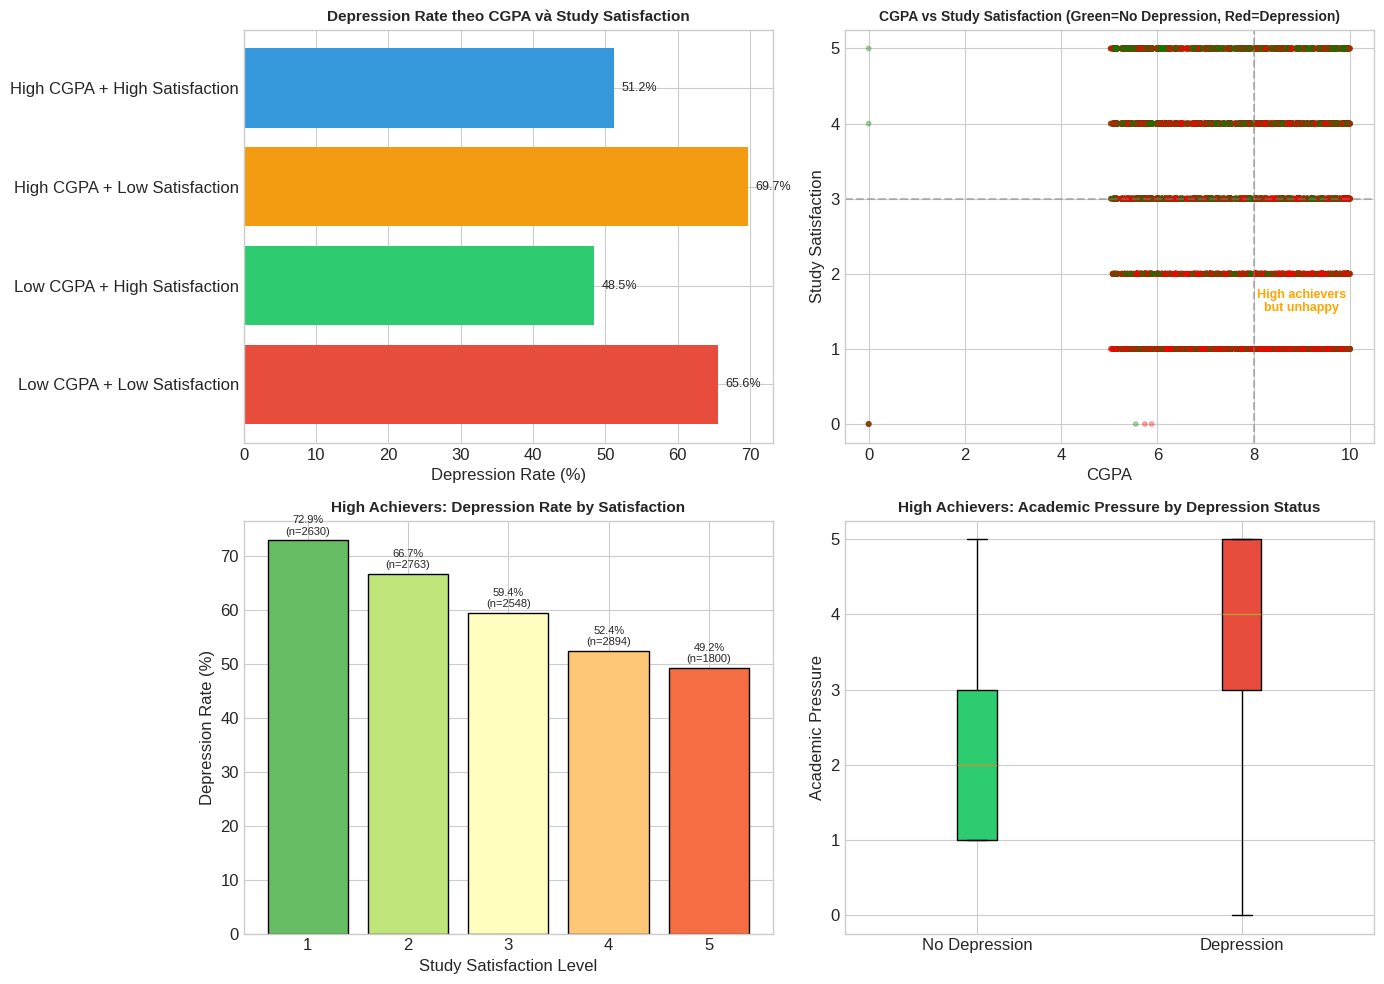


📈 Kiểm định thống kê:
   t-test (Academic Pressure - High Achievers with vs without Depression):
   t = 59.3557, p = 0.0000e+00

   ➤ CÓ sự khác biệt có ý nghĩa thống kê

📝 KẾT LUẬN:
   - 'High achievers but unhappy' TỒN TẠI
   - Tỷ lệ trầm cảm ở High Achievers: 60.7%
   - Đặc biệt, High Achievers với Low Satisfaction có tỷ lệ: 69.7%


In [68]:

print("\n" + "-"*50)
print("Q7: 'High achievers but unhappy' có thực sự tồn tại?")
print("-"*50)

# 1. Định nghĩa High Achievers: CGPA >= 8.0
high_achievers = df_clean[df_clean['CGPA'] >= 8.0].copy()
others = df_clean[df_clean['CGPA'] < 8.0].copy()

print(f"\n📊 Tổng quan:")
print(f"   High Achievers (CGPA ≥ 8.0): {len(high_achievers):,} ({len(high_achievers)/len(df_clean)*100:.1f}%)")
print(f"   Others (CGPA < 8.0): {len(others):,} ({len(others)/len(df_clean)*100:.1f}%)")

# 2. So sánh tỷ lệ trầm cảm
dep_rate_high = high_achievers['Depression'].mean() * 100
dep_rate_others = others['Depression'].mean() * 100

print(f"\n📊 Tỷ lệ trầm cảm:")
print(f"   High Achievers: {dep_rate_high:.1f}%")
print(f"   Others: {dep_rate_others:.1f}%")

# 3. Phân tích sâu hơn: High achievers with low satisfaction
high_achievers['Low_Satisfaction'] = high_achievers['Study Satisfaction'] <= 2
low_sat_high_cgpa = high_achievers[high_achievers['Low_Satisfaction']]

print(f"\n📊 High Achievers với Study Satisfaction thấp (≤2):")
print(f"   Số lượng: {len(low_sat_high_cgpa):,}")
print(f"   Tỷ lệ trầm cảm trong nhóm này: {low_sat_high_cgpa['Depression'].mean()*100:.1f}%")

# 4. So sánh đa chiều
comparison_df = pd.DataFrame({
    'Metric': ['Depression Rate', 'Avg Academic Pressure', 'Avg Study Satisfaction', 
               'Avg Financial Stress', 'Suicidal Thoughts Rate'],
    'High Achievers (CGPA≥8)': [
        f"{high_achievers['Depression'].mean()*100:.1f}%",
        f"{high_achievers['Academic Pressure'].mean():.2f}",
        f"{high_achievers['Study Satisfaction'].mean():.2f}",
        f"{high_achievers['Financial Stress'].mean():.2f}",
        f"{high_achievers['Suicidal_Thoughts'].mean()*100:.1f}%"
    ],
    'Others (CGPA<8)': [
        f"{others['Depression'].mean()*100:.1f}%",
        f"{others['Academic Pressure'].mean():.2f}",
        f"{others['Study Satisfaction'].mean():.2f}",
        f"{others['Financial Stress'].mean():.2f}",
        f"{others['Suicidal_Thoughts'].mean()*100:.1f}%"
    ]
})
print("\n📊 So sánh chi tiết:")
display(comparison_df)

# 5. Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Depression rate by CGPA group and Satisfaction
ax1 = axes[0, 0]
# Create combined groups
df_clean['Achievement_Sat'] = df_clean.apply(
    lambda x: 'High CGPA + Low Satisfaction' if x['CGPA'] >= 8 and x['Study Satisfaction'] <= 2
    else 'High CGPA + High Satisfaction' if x['CGPA'] >= 8 and x['Study Satisfaction'] >= 4
    else 'Low CGPA + Low Satisfaction' if x['CGPA'] < 8 and x['Study Satisfaction'] <= 2
    else 'Low CGPA + High Satisfaction' if x['CGPA'] < 8 and x['Study Satisfaction'] >= 4
    else 'Medium',
    axis=1
)
group_order = ['Low CGPA + Low Satisfaction', 'Low CGPA + High Satisfaction',
               'High CGPA + Low Satisfaction', 'High CGPA + High Satisfaction']
group_dep = df_clean.groupby('Achievement_Sat')['Depression'].mean() * 100
group_dep = group_dep.reindex([g for g in group_order if g in group_dep.index])
bars = ax1.barh(group_dep.index, group_dep.values, color=['#e74c3c', '#2ecc71', '#f39c12', '#3498db'])
ax1.set_xlabel('Depression Rate (%)')
ax1.set_title('Depression Rate theo CGPA và Study Satisfaction', fontsize=11, fontweight='bold')
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center', fontsize=9)

# Plot 2: Scatter - CGPA vs Study Satisfaction colored by Depression
ax2 = axes[0, 1]
colors = df_clean['Depression'].map({0: 'green', 1: 'red'})
scatter = ax2.scatter(df_clean['CGPA'], df_clean['Study Satisfaction'], 
                      c=colors, alpha=0.3, s=10)
ax2.set_xlabel('CGPA')
ax2.set_ylabel('Study Satisfaction')
ax2.set_title('CGPA vs Study Satisfaction (Green=No Depression, Red=Depression)', fontsize=10, fontweight='bold')
# Add quadrant lines
ax2.axhline(3, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(8, color='gray', linestyle='--', alpha=0.5)
ax2.text(9, 1.5, 'High achievers\nbut unhappy', fontsize=9, ha='center', color='orange', fontweight='bold')

# Plot 3: High achievers breakdown
ax3 = axes[1, 0]
satisfaction_breakdown = high_achievers.groupby('Study Satisfaction')['Depression'].agg(['mean', 'count'])
satisfaction_breakdown['Depression Rate'] = satisfaction_breakdown['mean'] * 100
ax3.bar(satisfaction_breakdown.index, satisfaction_breakdown['Depression Rate'], 
        color=plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 5)), edgecolor='black')
ax3.set_xlabel('Study Satisfaction Level')
ax3.set_ylabel('Depression Rate (%)')
ax3.set_title('High Achievers: Depression Rate by Satisfaction', fontsize=11, fontweight='bold')
for i, (idx, row) in enumerate(satisfaction_breakdown.iterrows()):
    ax3.text(idx, row['Depression Rate'] + 1, f"{row['Depression Rate']:.1f}%\n(n={int(row['count'])})", 
             ha='center', fontsize=8)

# Plot 4: Academic Pressure comparison
ax4 = axes[1, 1]
pressure_data = [high_achievers[high_achievers['Depression']==0]['Academic Pressure'],
                 high_achievers[high_achievers['Depression']==1]['Academic Pressure']]
bp = ax4.boxplot(pressure_data, labels=['No Depression', 'Depression'], patch_artist=True)
bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')
ax4.set_ylabel('Academic Pressure')
ax4.set_title('High Achievers: Academic Pressure by Depression Status', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. Statistical test
print("\n📈 Kiểm định thống kê:")
# t-test: Academic Pressure giữa 2 nhóm high achievers
t_stat, t_p = stats.ttest_ind(
    high_achievers[high_achievers['Depression']==1]['Academic Pressure'],
    high_achievers[high_achievers['Depression']==0]['Academic Pressure']
)
print(f"   t-test (Academic Pressure - High Achievers with vs without Depression):")
print(f"   t = {t_stat:.4f}, p = {t_p:.4e}")
print(f"\n   ➤ {'CÓ' if t_p < 0.05 else 'KHÔNG có'} sự khác biệt có ý nghĩa thống kê")
print(f"\n📝 KẾT LUẬN:")
print(f"   - 'High achievers but unhappy' {'TỒN TẠI' if dep_rate_high > 30 else 'không phổ biến'}")
print(f"   - Tỷ lệ trầm cảm ở High Achievers: {dep_rate_high:.1f}%")
print(f"   - Đặc biệt, High Achievers với Low Satisfaction có tỷ lệ: {low_sat_high_cgpa['Depression'].mean()*100:.1f}%")



--------------------------------------------------
Q8: Thời gian học/làm việc có ảnh hưởng độc lập với CGPA không?
--------------------------------------------------

📊 Correlation giữa Work/Study Hours và CGPA:
   r = 0.0026 (p = 6.6358e-01)

📊 Partial Correlation (Work/Study Hours ~ Depression | CGPA):
   Partial r = 0.2086

📈 Multiple Regression Analysis:
                     Coef.  Std.Err.          t          P>|t|    [0.025  \
const             0.331648  0.016256  20.401423   7.610718e-92  0.299785   
Work/Study Hours  0.027705  0.000778  35.617894  9.101222e-272  0.026180   
CGPA              0.007258  0.001961   3.701325   2.148891e-04  0.003414   

                    0.975]  
const             0.363511  
Work/Study Hours  0.029229  
CGPA              0.011101  

📊 Tỷ lệ trầm cảm theo Work/Study Hours (phân theo CGPA):


CGPA_Group,<5,5-6,6-7,7-8,8-9,9+
Hours_Group,,,,,,
0-3h,NaN,36.6,48.1,41.6,50.5,44.3
3-6h,NaN,51.4,59.5,49.2,58.9,54.3
6-9h,NaN,59.6,60.1,59.3,65.9,57.2
9h+,NaN,68.1,68.3,66.0,73.1,68.9


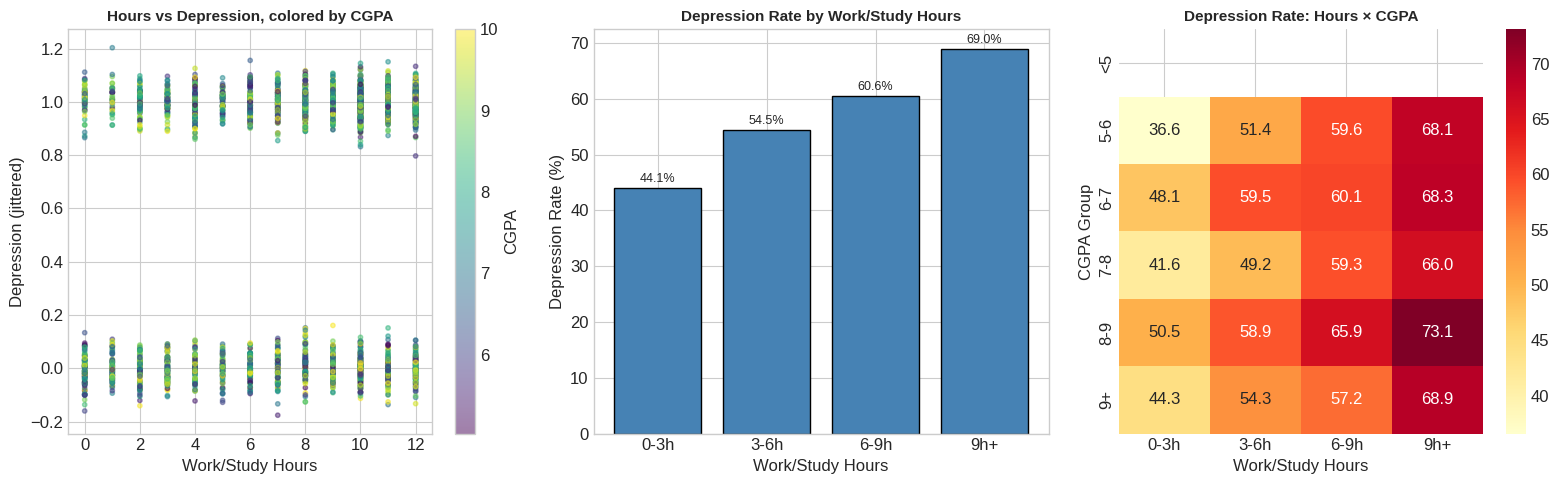


📊 Variance Inflation Factor (VIF):


,Feature,VIF
0,Work/Study Hours,4.179832
1,CGPA,4.179832


   VIF < 5: Không có multicollinearity nghiêm trọng
   VIF > 10: Multicollinearity nghiêm trọng

📝 KẾT LUẬN:
   - Partial correlation (controlling for CGPA): 0.2086
   - Work/Study Hours CÓ ảnh hưởng độc lập với CGPA


In [69]:

print("\n" + "-"*50)
print("Q8: Thời gian học/làm việc có ảnh hưởng độc lập với CGPA không?")
print("-"*50)

# 1. Correlation giữa Work/Study Hours và CGPA
r_hours_cgpa, p_hours_cgpa = pearsonr(df_clean['Work/Study Hours'].dropna(), 
                                       df_clean.loc[df_clean['Work/Study Hours'].notna(), 'CGPA'])
print(f"\n📊 Correlation giữa Work/Study Hours và CGPA:")
print(f"   r = {r_hours_cgpa:.4f} (p = {p_hours_cgpa:.4e})")

# 2. Partial correlation - kiểm soát CGPA
# Manual calculation of partial correlation
from scipy.stats import pearsonr

def partial_corr(x, y, control):
    """Calculate partial correlation between x and y, controlling for control"""
    r_xy = pearsonr(x, y)[0]
    r_xc = pearsonr(x, control)[0]
    r_yc = pearsonr(y, control)[0]
    
    partial_r = (r_xy - r_xc * r_yc) / np.sqrt((1 - r_xc**2) * (1 - r_yc**2))
    return partial_r

# Prepare data
model_data = df_clean[['Work/Study Hours', 'CGPA', 'Depression']].dropna()
partial_r = partial_corr(model_data['Work/Study Hours'], 
                         model_data['Depression'], 
                         model_data['CGPA'])

print(f"\n📊 Partial Correlation (Work/Study Hours ~ Depression | CGPA):")
print(f"   Partial r = {partial_r:.4f}")

# 3. Multiple Regression
print("\n📈 Multiple Regression Analysis:")
X_multi = model_data[['Work/Study Hours', 'CGPA']]
X_multi = sm.add_constant(X_multi)
y_multi = model_data['Depression']

model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary2().tables[1])

# 4. Phân tích theo nhóm giờ học
hours_bins = [0, 3, 6, 9, 15]
hours_labels = ['0-3h', '3-6h', '6-9h', '9h+']
df_clean['Hours_Group'] = pd.cut(df_clean['Work/Study Hours'], bins=hours_bins, labels=hours_labels)

# Depression rate by hours group, controlling for CGPA
print("\n📊 Tỷ lệ trầm cảm theo Work/Study Hours (phân theo CGPA):")
hours_cgpa_dep = df_clean.groupby(['Hours_Group', 'CGPA_Group'])['Depression'].mean() * 100
hours_cgpa_pivot = hours_cgpa_dep.unstack()
display(hours_cgpa_pivot.round(1))

# 5. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Scatter plot: Hours vs Depression with CGPA coloring
ax1 = axes[0]
sample = df_clean.sample(min(3000, len(df_clean)), random_state=42)
scatter = ax1.scatter(sample['Work/Study Hours'], sample['Depression'] + np.random.normal(0, 0.05, len(sample)),
                      c=sample['CGPA'], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, ax=ax1, label='CGPA')
ax1.set_xlabel('Work/Study Hours')
ax1.set_ylabel('Depression (jittered)')
ax1.set_title('Hours vs Depression, colored by CGPA', fontsize=11, fontweight='bold')

# Bar chart: Depression by Hours Group
ax2 = axes[1]
hours_dep = df_clean.groupby('Hours_Group')['Depression'].mean() * 100
bars = ax2.bar(hours_dep.index, hours_dep.values, color='steelblue', edgecolor='black')
ax2.set_xlabel('Work/Study Hours')
ax2.set_ylabel('Depression Rate (%)')
ax2.set_title('Depression Rate by Work/Study Hours', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', fontsize=9)

# Heatmap: Hours x CGPA
ax3 = axes[2]
sns.heatmap(hours_cgpa_pivot.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax3)
ax3.set_title('Depression Rate: Hours × CGPA', fontsize=11, fontweight='bold')
ax3.set_xlabel('Work/Study Hours')
ax3.set_ylabel('CGPA Group')

plt.tight_layout()
plt.show()

# 6. VIF để kiểm tra multicollinearity
print("\n📊 Variance Inflation Factor (VIF):")
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = model_data[['Work/Study Hours', 'CGPA']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
display(vif_data)
print("   VIF < 5: Không có multicollinearity nghiêm trọng")
print("   VIF > 10: Multicollinearity nghiêm trọng")

print(f"\n📝 KẾT LUẬN:")
print(f"   - Partial correlation (controlling for CGPA): {partial_r:.4f}")
print(f"   - Work/Study Hours {'CÓ' if abs(partial_r) > 0.1 else 'KHÔNG có'} ảnh hưởng độc lập với CGPA")



3.4 LỐI SỐNG & SỨC KHỎE TINH THẦN

--------------------------------------------------
Q9: Giấc ngủ ảnh hưởng đến trầm cảm mạnh đến mức nào?
--------------------------------------------------

📊 Tỷ lệ trầm cảm theo Sleep Duration:


,Depression Rate,Count,Depression %
Sleep Duration,,,
Less than 5 hours,0.645126,8310,64.5
5-6 hours,0.568818,6183,56.9
7-8 hours,0.595018,7346,59.5
More than 8 hours,0.509265,6044,50.9



📈 Chi-square test:
   χ² = 276.8484, p = 1.0653e-58

📊 Odds Ratio (<5 hours vs 7-8 hours):
   OR = 1.24
   ➤ Ngủ <5 giờ có nguy cơ trầm cảm cao gấp 1.2 lần so với ngủ 7-8 giờ


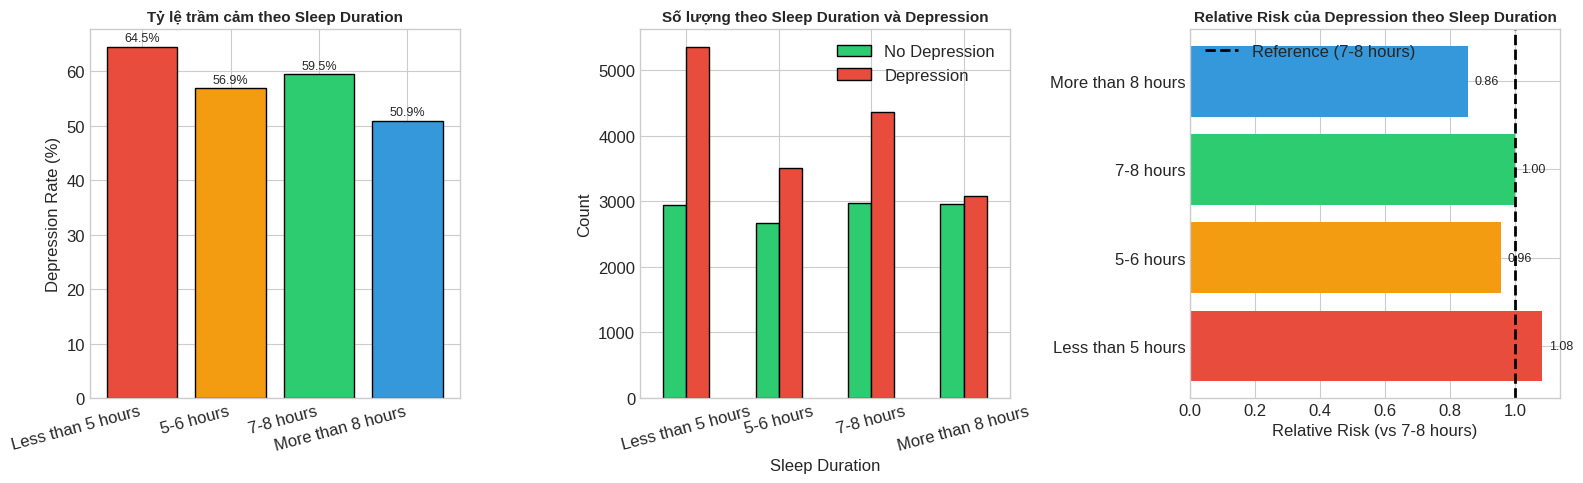


📝 KẾT LUẬN:
   - Giấc ngủ có ảnh hưởng MẠNH đến trầm cảm (p < 0.001)
   - Ngủ dưới 5 giờ: 64.5% trầm cảm
   - Ngủ 7-8 giờ: 59.5% trầm cảm
   - OR = 1.24 (thiếu ngủ tăng gấp 1.2x nguy cơ)


In [70]:

print("\n" + "="*70)
print("3.4 LỐI SỐNG & SỨC KHỎE TINH THẦN")
print("="*70)
print("\n" + "-"*50)
print("Q9: Giấc ngủ ảnh hưởng đến trầm cảm mạnh đến mức nào?")
print("-"*50)

# 1. Tỷ lệ trầm cảm theo Sleep Duration
sleep_dep = df_clean.groupby('Sleep Duration').agg({
    'Depression': ['mean', 'count']
})
sleep_dep.columns = ['Depression Rate', 'Count']
sleep_dep['Depression %'] = (sleep_dep['Depression Rate'] * 100).round(1)

# Sắp xếp theo thứ tự hợp lý
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
sleep_dep = sleep_dep.reindex(sleep_order)

print("\n📊 Tỷ lệ trầm cảm theo Sleep Duration:")
display(sleep_dep)

# 2. Chi-square test
contingency_sleep = pd.crosstab(df_clean['Sleep Duration'], df_clean['Depression'])
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_sleep)
print(f"\n📈 Chi-square test:")
print(f"   χ² = {chi2_sleep:.4f}, p = {p_sleep:.4e}")

# 3. Odds Ratio - So sánh <5 hours vs 7-8 hours
sleep_lt5 = df_clean[df_clean['Sleep Duration'] == 'Less than 5 hours']
sleep_7_8 = df_clean[df_clean['Sleep Duration'] == '7-8 hours']

dep_lt5 = sleep_lt5['Depression'].sum()
nodep_lt5 = len(sleep_lt5) - dep_lt5
dep_7_8 = sleep_7_8['Depression'].sum()
nodep_7_8 = len(sleep_7_8) - dep_7_8

odds_lt5 = dep_lt5 / nodep_lt5
odds_7_8 = dep_7_8 / nodep_7_8
or_sleep = odds_lt5 / odds_7_8

print(f"\n📊 Odds Ratio (<5 hours vs 7-8 hours):")
print(f"   OR = {or_sleep:.2f}")
print(f"   ➤ Ngủ <5 giờ có nguy cơ trầm cảm cao gấp {or_sleep:.1f} lần so với ngủ 7-8 giờ")

# 4. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar chart
ax1 = axes[0]
colors_sleep = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
bars = ax1.bar(range(len(sleep_dep)), sleep_dep['Depression %'], color=colors_sleep, edgecolor='black')
ax1.set_xticks(range(len(sleep_dep)))
ax1.set_xticklabels(sleep_dep.index, rotation=15, ha='right')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Tỷ lệ trầm cảm theo Sleep Duration', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', fontsize=9)

# Grouped bar chart - Sleep x Depression status
ax2 = axes[1]
sleep_counts = pd.crosstab(df_clean['Sleep Duration'], df_clean['Depression'])
sleep_counts = sleep_counts.reindex(sleep_order)
sleep_counts.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'], edgecolor='black')
ax2.set_xlabel('Sleep Duration')
ax2.set_ylabel('Count')
ax2.set_title('Số lượng theo Sleep Duration và Depression', fontsize=11, fontweight='bold')
ax2.legend(['No Depression', 'Depression'])
ax2.tick_params(axis='x', rotation=15)

# Relative Risk visualization
ax3 = axes[2]
reference = sleep_dep.loc['7-8 hours', 'Depression Rate']
relative_risk = sleep_dep['Depression Rate'] / reference
ax3.barh(relative_risk.index, relative_risk.values, color=colors_sleep)
ax3.axvline(1, color='black', linestyle='--', linewidth=2, label='Reference (7-8 hours)')
ax3.set_xlabel('Relative Risk (vs 7-8 hours)')
ax3.set_title('Relative Risk của Depression theo Sleep Duration', fontsize=11, fontweight='bold')
for i, (idx, val) in enumerate(relative_risk.items()):
    ax3.text(val + 0.02, i, f'{val:.2f}', va='center', fontsize=9)
ax3.legend()

plt.tight_layout()
plt.show()

print(f"\n📝 KẾT LUẬN:")
print(f"   - Giấc ngủ có ảnh hưởng MẠNH đến trầm cảm (p < 0.001)")
print(f"   - Ngủ dưới 5 giờ: {sleep_dep.loc['Less than 5 hours', 'Depression %']:.1f}% trầm cảm")
print(f"   - Ngủ 7-8 giờ: {sleep_dep.loc['7-8 hours', 'Depression %']:.1f}% trầm cảm")
print(f"   - OR = {or_sleep:.2f} (thiếu ngủ tăng gấp {or_sleep:.1f}x nguy cơ)")



--------------------------------------------------
Q10: Sleep Duration còn quan trọng khi đã kiểm soát Academic Pressure không?
--------------------------------------------------

📈 Logistic Regression (Sleep + Academic Pressure):
                        Coef.  Std.Err.          z         P>|z|    [0.025  \
const               -1.756836  0.046180 -38.042907  0.000000e+00 -1.847348   
Sleep_Hours_Encoded -0.156161  0.012366 -12.627807  1.483557e-36 -0.180399   
Academic Pressure    0.817958  0.011319  72.261156  0.000000e+00  0.795772   

                       0.975]  
const               -1.666324  
Sleep_Hours_Encoded -0.131924  
Academic Pressure    0.840144  

📊 Tỷ lệ trầm cảm theo Sleep Duration, stratified by Academic Pressure:


AP_Group,Low (1-2),Medium (3-4),High (5)
Sleep Duration,,,
Less than 5 hours,33.1,71.8,89.6
5-6 hours,26.7,66.1,83.4
7-8 hours,29.0,67.2,86.3
More than 8 hours,21.4,59.5,82.9


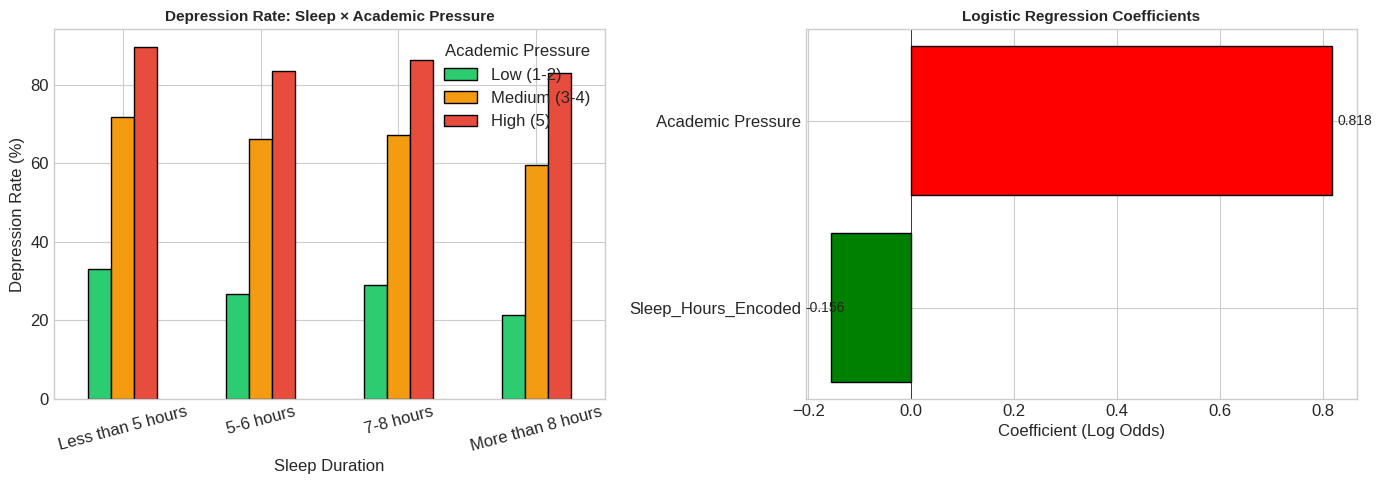


📊 Odds Ratios từ Logistic Regression:
   Sleep_Hours_Encoded: OR = 0.855
   Academic Pressure: OR = 2.266

📝 GIẢI THÍCH:
   - Sleep OR < 1: Ngủ nhiều hơn → giảm nguy cơ trầm cảm
   - Cứ tăng 1 mức sleep category → OR giảm 14.5%

📝 KẾT LUẬN:
   ✅ Sleep Duration VẪN CÒN QUAN TRỌNG sau khi kiểm soát Academic Pressure
      (p = 1.4836e-36)


In [71]:

print("\n" + "-"*50)
print("Q10: Sleep Duration còn quan trọng khi đã kiểm soát Academic Pressure không?")
print("-"*50)

# 1. Logistic Regression với cả 2 biến
model_data_sleep = df_clean[['Sleep_Hours_Encoded', 'Academic Pressure', 'Depression']].dropna()

X_sleep = model_data_sleep[['Sleep_Hours_Encoded', 'Academic Pressure']]
X_sleep = sm.add_constant(X_sleep)
y_sleep = model_data_sleep['Depression']

model_sleep = sm.Logit(y_sleep, X_sleep).fit(disp=0)
print("\n📈 Logistic Regression (Sleep + Academic Pressure):")
print(model_sleep.summary2().tables[1])

# 2. Stratified analysis - Depression rate by Sleep, stratified by Academic Pressure
df_clean['AP_Group'] = pd.cut(df_clean['Academic Pressure'], bins=[0, 2, 4, 6], labels=['Low (1-2)', 'Medium (3-4)', 'High (5)'])

stratified = df_clean.groupby(['Sleep Duration', 'AP_Group'])['Depression'].mean() * 100
stratified_pivot = stratified.unstack()
stratified_pivot = stratified_pivot.reindex(sleep_order)

print("\n📊 Tỷ lệ trầm cảm theo Sleep Duration, stratified by Academic Pressure:")
display(stratified_pivot.round(1))

# 3. Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stratified bar chart
ax1 = axes[0]
stratified_pivot.plot(kind='bar', ax=ax1, color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black')
ax1.set_xlabel('Sleep Duration')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Depression Rate: Sleep × Academic Pressure', fontsize=11, fontweight='bold')
ax1.legend(title='Academic Pressure')
ax1.tick_params(axis='x', rotation=15)

# Coefficient comparison
ax2 = axes[1]
coef_names = ['Sleep_Hours_Encoded', 'Academic Pressure']
coef_vals = [model_sleep.params['Sleep_Hours_Encoded'], model_sleep.params['Academic Pressure']]
colors = ['green' if v < 0 else 'red' for v in coef_vals]
bars = ax2.barh(coef_names, coef_vals, color=colors, edgecolor='black')
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('Coefficient (Log Odds)')
ax2.set_title('Logistic Regression Coefficients', fontsize=11, fontweight='bold')
for bar in bars:
    width = bar.get_width()
    ax2.text(width + 0.01 if width > 0 else width - 0.05, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Calculate odds ratios
print("\n📊 Odds Ratios từ Logistic Regression:")
odds_ratios = np.exp(model_sleep.params)
print(f"   Sleep_Hours_Encoded: OR = {odds_ratios['Sleep_Hours_Encoded']:.3f}")
print(f"   Academic Pressure: OR = {odds_ratios['Academic Pressure']:.3f}")

print(f"\n📝 GIẢI THÍCH:")
print(f"   - Sleep OR < 1: Ngủ nhiều hơn → giảm nguy cơ trầm cảm")
print(f"   - Cứ tăng 1 mức sleep category → OR giảm {(1-odds_ratios['Sleep_Hours_Encoded'])*100:.1f}%")
print(f"\n📝 KẾT LUẬN:")
if model_sleep.pvalues['Sleep_Hours_Encoded'] < 0.05:
    print(f"   ✅ Sleep Duration VẪN CÒN QUAN TRỌNG sau khi kiểm soát Academic Pressure")
    print(f"      (p = {model_sleep.pvalues['Sleep_Hours_Encoded']:.4e})")
else:
    print(f"   ❌ Sleep Duration KHÔNG CÒN QUAN TRỌNG sau khi kiểm soát Academic Pressure")



--------------------------------------------------
Q11: Dietary Habits có tác động trực tiếp hay gián tiếp qua giấc ngủ?
--------------------------------------------------

📊 Tỷ lệ trầm cảm theo Dietary Habits:
   Unhealthy: 70.7%
   Moderate: 56.0%
   Healthy: 45.4%

📊 Phân phối Sleep Duration theo Dietary Habits (%):


Sleep Duration,5-6 hours,7-8 hours,Less than 5 hours,More than 8 hours,Others
Dietary Habits,,,,,
Unhealthy,21.1,27.3,29.7,21.7,0.1
Moderate,22.3,25.4,30.6,21.6,0.1
Healthy,23.3,26.2,28.7,21.7,0.0



📈 Mediation Analysis (Baron & Kenny Steps):

   Step 1 (Diet → Depression): c = -0.5366, p = 4.1797e-255
   Step 2 (Diet → Sleep): a = -0.0023, p = 7.8484e-01
   Step 3 (Diet + Sleep → Depression):
      c' (Diet|Sleep) = -0.5413, p = 3.3495e-257
      b (Sleep|Diet) = -0.1654, p = 3.5431e-50

📊 Phân tích Mediation:
   Total effect (c): -0.5366
   Direct effect (c'): -0.5413
   Indirect effect (a*b): 0.0004
   Proportion mediated: 0.1%


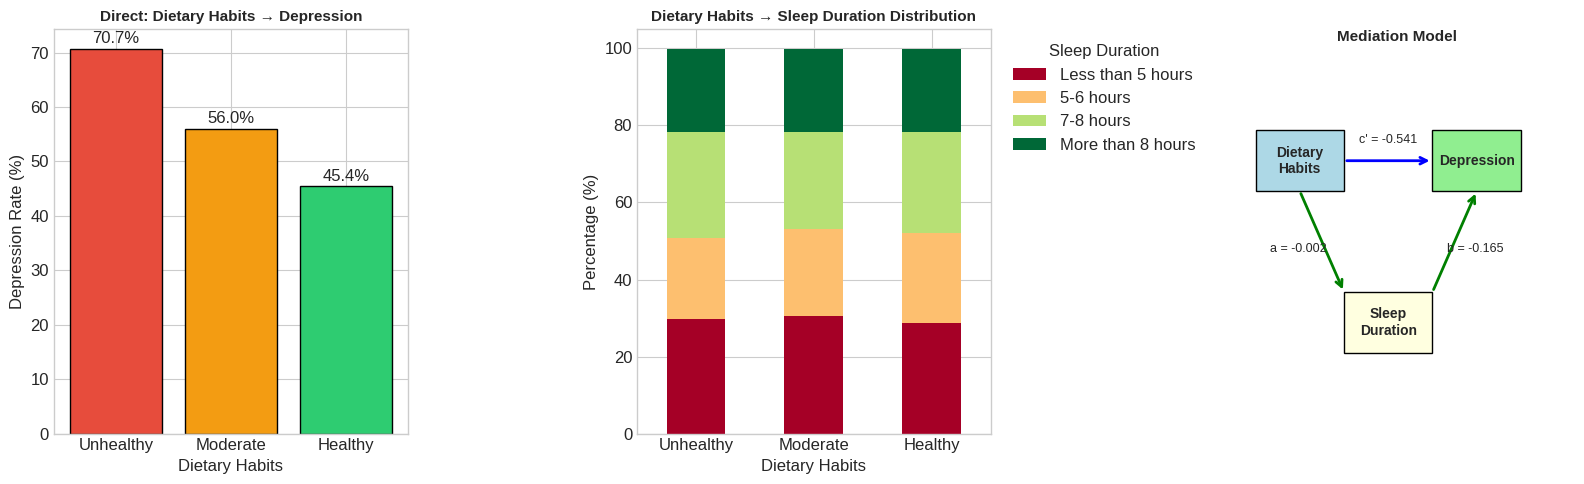


📝 KẾT LUẬN:
   - Sleep Duration là mediator YẾU (0.1% effect được mediate)
   - Dietary Habits chủ yếu có tác động TRỰC TIẾP đến Depression


In [72]:

print("\n" + "-"*50)
print("Q11: Dietary Habits có tác động trực tiếp hay gián tiếp qua giấc ngủ?")
print("-"*50)

# 1. Direct relationship: Diet → Depression
diet_dep = df_clean.groupby('Dietary Habits')['Depression'].mean() * 100
diet_order = ['Unhealthy', 'Moderate', 'Healthy']
diet_dep = diet_dep.reindex(diet_order)

print("\n📊 Tỷ lệ trầm cảm theo Dietary Habits:")
for diet, rate in diet_dep.items():
    print(f"   {diet}: {rate:.1f}%")

# 2. Relationship: Diet → Sleep
diet_sleep = pd.crosstab(df_clean['Dietary Habits'], df_clean['Sleep Duration'], normalize='index') * 100
diet_sleep = diet_sleep.reindex(diet_order)
print("\n📊 Phân phối Sleep Duration theo Dietary Habits (%):")
display(diet_sleep.round(1))

# 3. Mediation Analysis (simplified - Baron & Kenny approach)
print("\n📈 Mediation Analysis (Baron & Kenny Steps):")

# Step 1: X → Y (Diet → Depression)
model_data_med = df_clean[['Diet_Encoded', 'Sleep_Hours_Encoded', 'Depression']].dropna()

X1 = sm.add_constant(model_data_med['Diet_Encoded'])
y = model_data_med['Depression']
model_step1 = sm.Logit(y, X1).fit(disp=0)
c = model_step1.params['Diet_Encoded']
p_c = model_step1.pvalues['Diet_Encoded']
print(f"\n   Step 1 (Diet → Depression): c = {c:.4f}, p = {p_c:.4e}")

# Step 2: X → M (Diet → Sleep)
X2 = sm.add_constant(model_data_med['Diet_Encoded'])
m = model_data_med['Sleep_Hours_Encoded']
model_step2 = sm.OLS(m, X2).fit()
a = model_step2.params['Diet_Encoded']
p_a = model_step2.pvalues['Diet_Encoded']
print(f"   Step 2 (Diet → Sleep): a = {a:.4f}, p = {p_a:.4e}")

# Step 3: X, M → Y (Diet, Sleep → Depression)
X3 = sm.add_constant(model_data_med[['Diet_Encoded', 'Sleep_Hours_Encoded']])
model_step3 = sm.Logit(y, X3).fit(disp=0)
c_prime = model_step3.params['Diet_Encoded']
b = model_step3.params['Sleep_Hours_Encoded']
p_c_prime = model_step3.pvalues['Diet_Encoded']
p_b = model_step3.pvalues['Sleep_Hours_Encoded']
print(f"   Step 3 (Diet + Sleep → Depression):")
print(f"      c' (Diet|Sleep) = {c_prime:.4f}, p = {p_c_prime:.4e}")
print(f"      b (Sleep|Diet) = {b:.4f}, p = {p_b:.4e}")

# Calculate indirect effect
indirect = a * b
total = c
direct = c_prime
proportion_mediated = (indirect / total * 100) if total != 0 else 0

print(f"\n📊 Phân tích Mediation:")
print(f"   Total effect (c): {total:.4f}")
print(f"   Direct effect (c'): {direct:.4f}")
print(f"   Indirect effect (a*b): {indirect:.4f}")
print(f"   Proportion mediated: {abs(proportion_mediated):.1f}%")

# 4. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Diet → Depression
ax1 = axes[0]
colors_diet = ['#e74c3c', '#f39c12', '#2ecc71']
bars = ax1.bar(diet_dep.index, diet_dep.values, color=colors_diet, edgecolor='black')
ax1.set_xlabel('Dietary Habits')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Direct: Dietary Habits → Depression', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center')

# Diet → Sleep distribution
ax2 = axes[1]
diet_sleep[['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']].plot(
    kind='bar', stacked=True, ax=ax2, colormap='RdYlGn')
ax2.set_xlabel('Dietary Habits')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Dietary Habits → Sleep Duration Distribution', fontsize=11, fontweight='bold')
ax2.legend(title='Sleep Duration', bbox_to_anchor=(1.02, 1))
ax2.tick_params(axis='x', rotation=0)

# Mediation diagram (simplified visualization)
ax3 = axes[2]
ax3.axis('off')
# Draw boxes and arrows
ax3.add_patch(plt.Rectangle((0.1, 0.6), 0.25, 0.15, fill=True, facecolor='lightblue', edgecolor='black'))
ax3.add_patch(plt.Rectangle((0.6, 0.6), 0.25, 0.15, fill=True, facecolor='lightgreen', edgecolor='black'))
ax3.add_patch(plt.Rectangle((0.35, 0.2), 0.25, 0.15, fill=True, facecolor='lightyellow', edgecolor='black'))

ax3.text(0.225, 0.675, 'Dietary\nHabits', ha='center', va='center', fontsize=10, fontweight='bold')
ax3.text(0.725, 0.675, 'Depression', ha='center', va='center', fontsize=10, fontweight='bold')
ax3.text(0.475, 0.275, 'Sleep\nDuration', ha='center', va='center', fontsize=10, fontweight='bold')

# Arrows
ax3.annotate('', xy=(0.6, 0.675), xytext=(0.35, 0.675),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax3.annotate('', xy=(0.35, 0.35), xytext=(0.225, 0.6),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax3.annotate('', xy=(0.725, 0.6), xytext=(0.6, 0.35),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

# Labels
ax3.text(0.475, 0.72, f"c' = {direct:.3f}", fontsize=9, ha='center')
ax3.text(0.22, 0.45, f"a = {a:.3f}", fontsize=9, ha='center')
ax3.text(0.72, 0.45, f"b = {b:.3f}", fontsize=9, ha='center')
ax3.set_title('Mediation Model', fontsize=11, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

print(f"\n📝 KẾT LUẬN:")
if abs(proportion_mediated) > 30:
    print(f"   - Sleep Duration là mediator QUAN TRỌNG ({abs(proportion_mediated):.1f}% effect được mediate)")
    print(f"   - Dietary Habits có cả tác động trực tiếp VÀ gián tiếp qua Sleep")
else:
    print(f"   - Sleep Duration là mediator YẾU ({abs(proportion_mediated):.1f}% effect được mediate)")
    print(f"   - Dietary Habits chủ yếu có tác động TRỰC TIẾP đến Depression")



3.5 STRESS TÂM LÝ & YẾU TỐ NỀN

--------------------------------------------------
Q12: Financial Stress hay Academic Pressure tác động mạnh hơn?
--------------------------------------------------

📊 Point-biserial Correlations:
   Academic Pressure → Depression: r = 0.4748 (p = 0.0000e+00)
   Financial Stress → Depression: r = 0.3636 (p = 0.0000e+00)

📈 Logistic Regression với Standardized Coefficients:
                            Coef.  Std.Err.          z          P>|z|  \
const                    0.484277  0.015000  32.284988  1.136339e-228   
Academic Pressure (std)  1.152884  0.016693  69.062992   0.000000e+00   
Financial Stress (std)   0.825089  0.015576  52.972842   0.000000e+00   

                           [0.025    0.975]  
const                    0.454877  0.513677  
Academic Pressure (std)  1.120166  1.185602  
Financial Stress (std)   0.794561  0.855616  

📊 Odds Ratios (per 1 SD increase):
   Academic Pressure (std): OR = 3.167 (95% CI: 3.065 - 3.273)
   Financial St

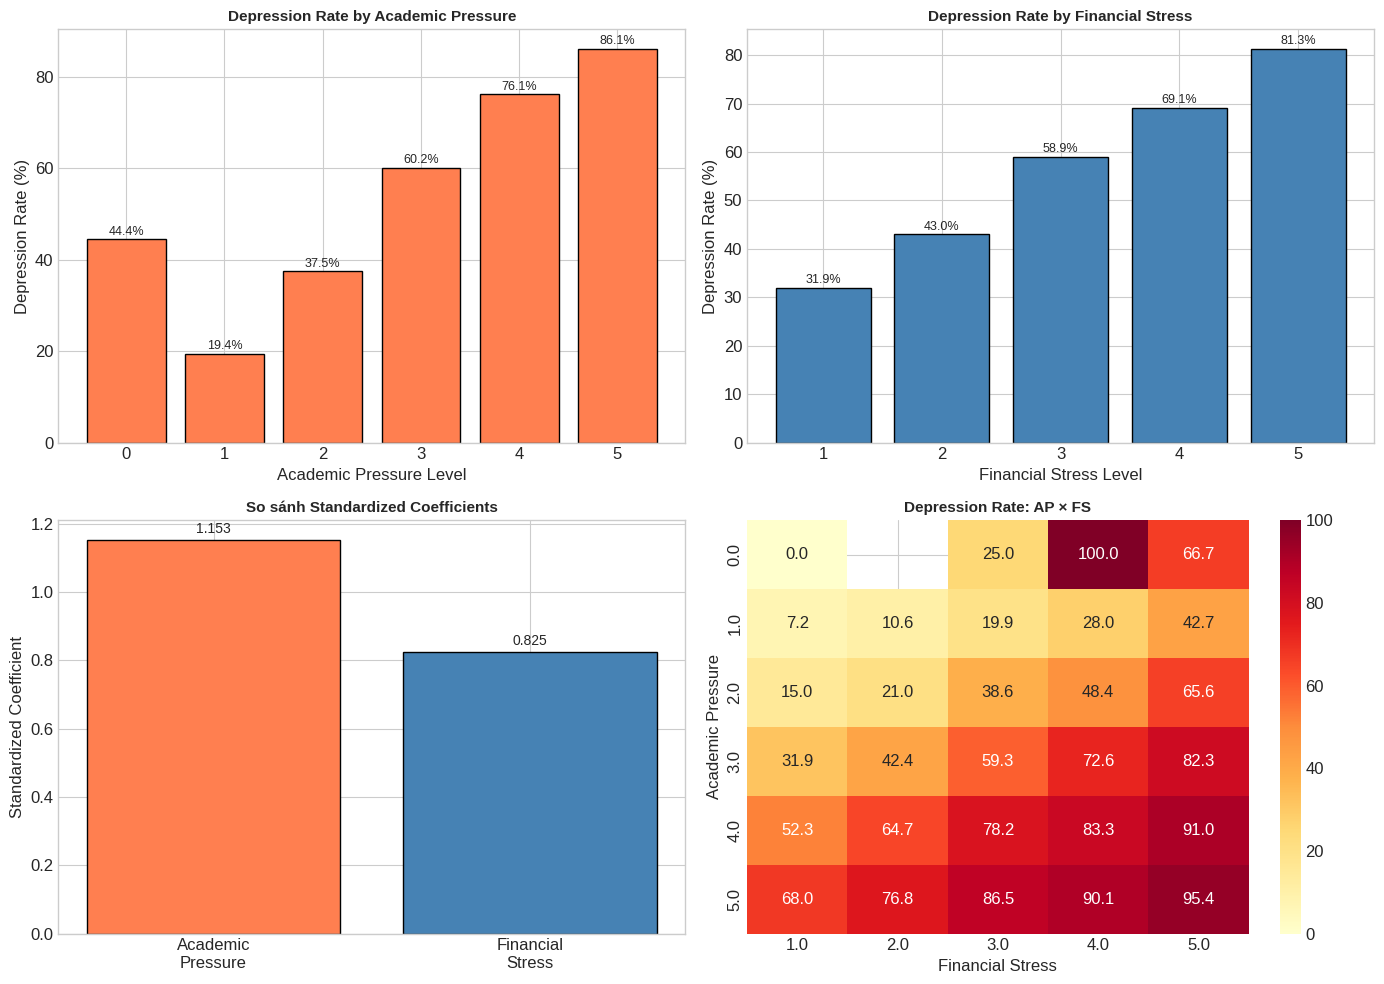


📝 KẾT LUẬN:
   - Academic Pressure có tác động MẠNH HƠN đến Depression
   - Tỷ lệ coefficient: AP/FS = 1.40
   - Cả hai đều có ý nghĩa thống kê (p < 0.05)


In [73]:

print("\n" + "="*70)
print("3.5 STRESS TÂM LÝ & YẾU TỐ NỀN")
print("="*70)
print("\n" + "-"*50)
print("Q12: Financial Stress hay Academic Pressure tác động mạnh hơn?")
print("-"*50)

# 1. Bivariate correlations
# Drop NaN values before correlation
model_data_corr = df_clean[['Depression', 'Academic Pressure', 'Financial Stress']].dropna()
r_ap, p_ap = pointbiserialr(model_data_corr['Depression'], model_data_corr['Academic Pressure'])
r_fs, p_fs = pointbiserialr(model_data_corr['Depression'], model_data_corr['Financial Stress'])

print(f"\n📊 Point-biserial Correlations:")
print(f"   Academic Pressure → Depression: r = {r_ap:.4f} (p = {p_ap:.4e})")
print(f"   Financial Stress → Depression: r = {r_fs:.4f} (p = {p_fs:.4e})")

# 2. Logistic Regression - standardized coefficients
from sklearn.preprocessing import StandardScaler

model_data_stress = df_clean[['Academic Pressure', 'Financial Stress', 'Depression']].dropna()

# Standardize
scaler = StandardScaler()
X_std = scaler.fit_transform(model_data_stress[['Academic Pressure', 'Financial Stress']])
X_std_df = pd.DataFrame(X_std, columns=['Academic Pressure (std)', 'Financial Stress (std)'])
X_std_df = sm.add_constant(X_std_df)
y_stress = model_data_stress['Depression'].values

model_std = sm.Logit(y_stress, X_std_df).fit(disp=0)
print("\n📈 Logistic Regression với Standardized Coefficients:")
print(model_std.summary2().tables[1])

# 3. Odds Ratios
print("\n📊 Odds Ratios (per 1 SD increase):")
for var in ['Academic Pressure (std)', 'Financial Stress (std)']:
    or_val = np.exp(model_std.params[var])
    ci_low = np.exp(model_std.conf_int().loc[var, 0])
    ci_high = np.exp(model_std.conf_int().loc[var, 1])
    print(f"   {var}: OR = {or_val:.3f} (95% CI: {ci_low:.3f} - {ci_high:.3f})")

# 4. Depression rate by levels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# AP effect
ax1 = axes[0, 0]
ap_dep = df_clean.groupby('Academic Pressure')['Depression'].mean() * 100
ax1.bar(ap_dep.index, ap_dep.values, color='coral', edgecolor='black')
ax1.set_xlabel('Academic Pressure Level')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Depression Rate by Academic Pressure', fontsize=11, fontweight='bold')
for i, v in enumerate(ap_dep.values):
    ax1.text(ap_dep.index[i], v + 1, f'{v:.1f}%', ha='center', fontsize=9)

# FS effect
ax2 = axes[0, 1]
fs_dep = df_clean.groupby('Financial Stress')['Depression'].mean() * 100
ax2.bar(fs_dep.index, fs_dep.values, color='steelblue', edgecolor='black')
ax2.set_xlabel('Financial Stress Level')
ax2.set_ylabel('Depression Rate (%)')
ax2.set_title('Depression Rate by Financial Stress', fontsize=11, fontweight='bold')
for i, v in enumerate(fs_dep.values):
    ax2.text(fs_dep.index[i], v + 1, f'{v:.1f}%', ha='center', fontsize=9)

# Coefficient comparison
ax3 = axes[1, 0]
coefs = pd.Series({
    'Academic\nPressure': model_std.params['Academic Pressure (std)'],
    'Financial\nStress': model_std.params['Financial Stress (std)']
})
colors = ['coral', 'steelblue']
bars = ax3.bar(coefs.index, coefs.values, color=colors, edgecolor='black')
ax3.set_ylabel('Standardized Coefficient')
ax3.set_title('So sánh Standardized Coefficients', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.3f}', ha='center', fontsize=10)

# Interaction heatmap
ax4 = axes[1, 1]
interaction_fs_ap = df_clean.groupby(['Academic Pressure', 'Financial Stress'])['Depression'].mean() * 100
interaction_pivot = interaction_fs_ap.unstack()
sns.heatmap(interaction_pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax4)
ax4.set_title('Depression Rate: AP × FS', fontsize=11, fontweight='bold')
ax4.set_xlabel('Financial Stress')
ax4.set_ylabel('Academic Pressure')

plt.tight_layout()
plt.show()

# 5. Kết luận
winner = 'Academic Pressure' if abs(model_std.params['Academic Pressure (std)']) > abs(model_std.params['Financial Stress (std)']) else 'Financial Stress'
ratio = abs(model_std.params['Academic Pressure (std)']) / abs(model_std.params['Financial Stress (std)'])

print(f"\n📝 KẾT LUẬN:")
print(f"   - {winner} có tác động MẠNH HƠN đến Depression")
print(f"   - Tỷ lệ coefficient: AP/FS = {ratio:.2f}")
print(f"   - Cả hai đều có ý nghĩa thống kê (p < 0.05)")



--------------------------------------------------
Q13: Suicidal Thoughts có thể xem là tín hiệu cảnh báo sớm không?
--------------------------------------------------

📊 Cross-tabulation (Count):


Depression,0,1,All
Have you ever had suicidal thoughts ?,,,
No,7866,2379,10245
Yes,3699,13957,17656
All,11565,16336,27901



📊 Cross-tabulation (%):


Depression,0,1
Have you ever had suicidal thoughts ?,,
No,76.8,23.2
Yes,21.0,79.0



📊 Diagnostic Metrics (Suicidal Thoughts as predictor):
   Sensitivity (Recall): 85.4%
   Specificity: 68.0%
   PPV (Precision): 79.0%
   NPV: 76.8%

📊 Odds Ratio:
   OR = 12.48
   ➤ Người có Suicidal Thoughts có nguy cơ Depression cao gấp 12.5 lần


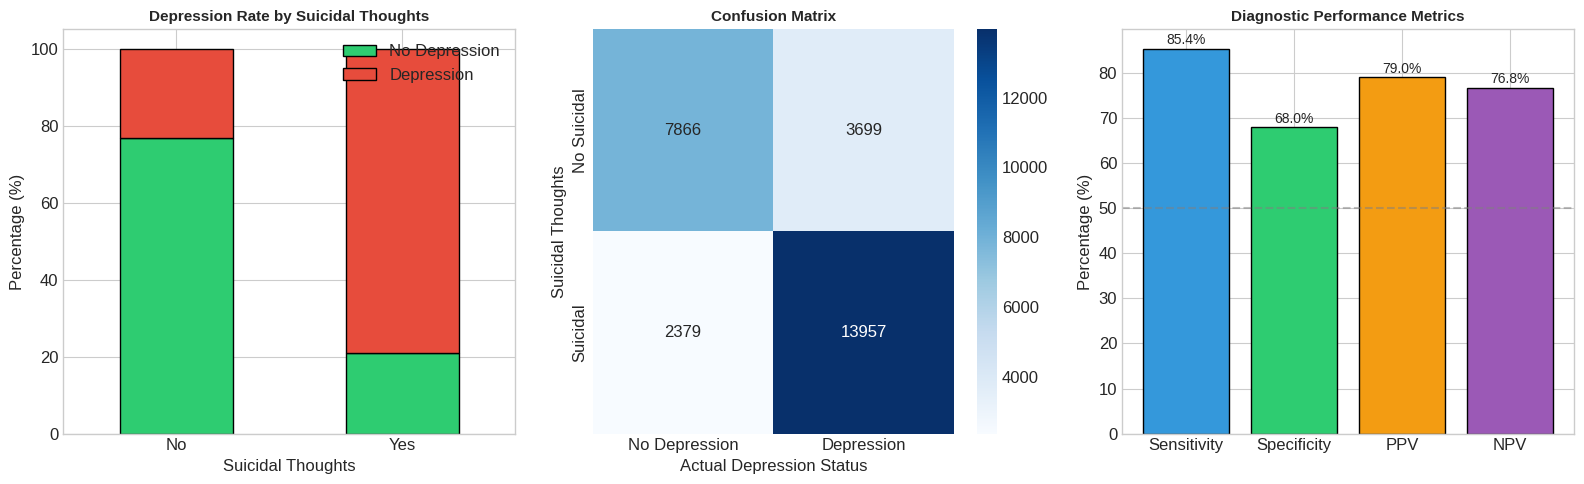


📈 Chi-square test:
   χ² = 8323.87, p = 0.0000e+00

📝 KẾT LUẬN:
   - Suicidal Thoughts CÓ THỂ dùng làm tín hiệu cảnh báo sớm
   - Sensitivity = 85.4% (detect 85% cases)
   - PPV = 79.0% (trong số có suicidal thoughts, 79% thực sự depression)
   - Tuy nhiên, cần kết hợp với các yếu tố khác để có độ chính xác cao hơn


In [74]:

print("\n" + "-"*50)
print("Q13: Suicidal Thoughts có thể xem là tín hiệu cảnh báo sớm không?")
print("-"*50)

# 1. Cross-tabulation
suicidal_dep = pd.crosstab(df_clean['Have you ever had suicidal thoughts ?'], 
                           df_clean['Depression'], margins=True)
suicidal_dep_pct = pd.crosstab(df_clean['Have you ever had suicidal thoughts ?'], 
                               df_clean['Depression'], normalize='index') * 100

print("\n📊 Cross-tabulation (Count):")
display(suicidal_dep)
print("\n📊 Cross-tabulation (%):")
display(suicidal_dep_pct.round(1))

# 2. Key metrics
# Sensitivity (True Positive Rate): P(Suicidal=Yes | Depression=Yes)
# Specificity (True Negative Rate): P(Suicidal=No | Depression=No)
# PPV (Positive Predictive Value): P(Depression=Yes | Suicidal=Yes)
# NPV (Negative Predictive Value): P(Depression=No | Suicidal=No)

dep_data = df_clean.dropna(subset=['Suicidal_Thoughts', 'Depression'])
TP = len(dep_data[(dep_data['Suicidal_Thoughts']==1) & (dep_data['Depression']==1)])
TN = len(dep_data[(dep_data['Suicidal_Thoughts']==0) & (dep_data['Depression']==0)])
FP = len(dep_data[(dep_data['Suicidal_Thoughts']==1) & (dep_data['Depression']==0)])
FN = len(dep_data[(dep_data['Suicidal_Thoughts']==0) & (dep_data['Depression']==1)])

sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0

print("\n📊 Diagnostic Metrics (Suicidal Thoughts as predictor):")
print(f"   Sensitivity (Recall): {sensitivity*100:.1f}%")
print(f"   Specificity: {specificity*100:.1f}%")
print(f"   PPV (Precision): {ppv*100:.1f}%")
print(f"   NPV: {npv*100:.1f}%")

# 3. Odds Ratio
odds_suicidal = TP / FP if FP > 0 else np.inf
odds_no_suicidal = FN / TN if TN > 0 else np.inf
or_suicidal = odds_suicidal / odds_no_suicidal if odds_no_suicidal > 0 else np.inf

print(f"\n📊 Odds Ratio:")
print(f"   OR = {or_suicidal:.2f}")
print(f"   ➤ Người có Suicidal Thoughts có nguy cơ Depression cao gấp {or_suicidal:.1f} lần")

# 4. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Stacked bar chart
ax1 = axes[0]
suicidal_dep_pct.drop('All', errors='ignore').plot(kind='bar', stacked=True, 
                                                    ax=ax1, color=['#2ecc71', '#e74c3c'],
                                                    edgecolor='black')
ax1.set_xlabel('Suicidal Thoughts')
ax1.set_ylabel('Percentage (%)')
ax1.set_title('Depression Rate by Suicidal Thoughts', fontsize=11, fontweight='bold')
ax1.legend(['No Depression', 'Depression'])
ax1.tick_params(axis='x', rotation=0)

# Confusion Matrix style
ax2 = axes[1]
cm = np.array([[TN, FP], [FN, TP]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['No Depression', 'Depression'],
            yticklabels=['No Suicidal', 'Suicidal'])
ax2.set_xlabel('Actual Depression Status')
ax2.set_ylabel('Suicidal Thoughts')
ax2.set_title('Confusion Matrix', fontsize=11, fontweight='bold')

# Metrics visualization
ax3 = axes[2]
metrics = ['Sensitivity', 'Specificity', 'PPV', 'NPV']
values = [sensitivity, specificity, ppv, npv]
colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6']
bars = ax3.bar(metrics, [v*100 for v in values], color=colors, edgecolor='black')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('Diagnostic Performance Metrics', fontsize=11, fontweight='bold')
ax3.axhline(50, color='gray', linestyle='--', alpha=0.5)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Chi-square test
chi2_suicidal, p_suicidal, _, _ = chi2_contingency(suicidal_dep.drop('All').drop('All', axis=1))
print(f"\n📈 Chi-square test:")
print(f"   χ² = {chi2_suicidal:.2f}, p = {p_suicidal:.4e}")

print(f"\n📝 KẾT LUẬN:")
print(f"   - Suicidal Thoughts {'CÓ THỂ' if sensitivity > 0.5 and ppv > 0.5 else 'KHÓ'} dùng làm tín hiệu cảnh báo sớm")
print(f"   - Sensitivity = {sensitivity*100:.1f}% (detect {sensitivity*100:.0f}% cases)")
print(f"   - PPV = {ppv*100:.1f}% (trong số có suicidal thoughts, {ppv*100:.0f}% thực sự depression)")
print(f"   - Tuy nhiên, cần kết hợp với các yếu tố khác để có độ chính xác cao hơn")



--------------------------------------------------
Q14: Family History còn ý nghĩa khi đã kiểm soát môi trường sống?
--------------------------------------------------

📊 Tỷ lệ trầm cảm theo Family History (unadjusted):
   No: 56.0%
   Yes: 61.3%

📈 Model 1: Family History Only
   Coefficient: 0.2165
   OR: 1.242
   p-value: 6.6737e-19

📈 Model 2: Full Model (controlling for environment)
   Family History Coefficient: 0.2290
   OR: 1.257
   p-value: 1.6773e-13

📊 Effect Attenuation: -5.8%

📈 Full Model Coefficients:


,Variable,Coefficient,OR,p-value
1,Family_History,0.2290,1.2574,0.0
2,Academic Pressure,0.8288,2.2905,0.0
3,Study Satisfaction,-0.2249,0.7986,0.0
4,Financial Stress,0.5740,1.7753,0.0
5,Sleep_Hours_Encoded,-0.1842,0.8318,0.0
6,Diet_Encoded,-0.5540,0.5746,0.0
7,Work/Study Hours,0.1181,1.1254,0.0


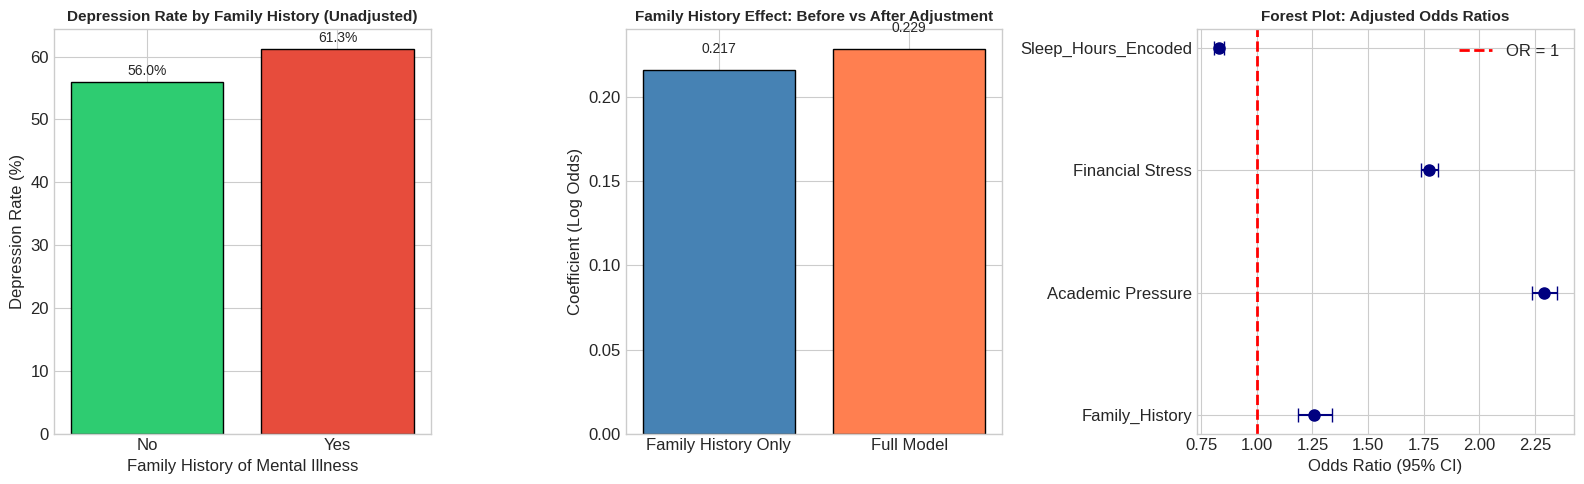


📝 KẾT LUẬN:
   ✅ Family History VẪN CÓ Ý NGHĨA sau khi kiểm soát môi trường
      (OR = 1.26, p = 1.6773e-13)
   ➤ Yếu tố di truyền/gia đình có tác động ĐỘC LẬP với môi trường


In [75]:

print("\n" + "-"*50)
print("Q14: Family History còn ý nghĩa khi đã kiểm soát môi trường sống?")
print("-"*50)

# 1. Unadjusted effect
fh_dep = df_clean.groupby('Family History of Mental Illness')['Depression'].mean() * 100
print("\n📊 Tỷ lệ trầm cảm theo Family History (unadjusted):")
for fh, rate in fh_dep.items():
    print(f"   {fh}: {rate:.1f}%")

# 2. Logistic Regression - Full model with environment variables
env_vars = ['Academic Pressure', 'Study Satisfaction', 'Financial Stress', 
            'Sleep_Hours_Encoded', 'Diet_Encoded', 'Work/Study Hours']

model_data_fh = df_clean[['Family_History', 'Depression'] + env_vars].dropna()

# Model 1: Family History only
X1 = sm.add_constant(model_data_fh['Family_History'])
y = model_data_fh['Depression']
model_fh_only = sm.Logit(y, X1).fit(disp=0)

# Model 2: Full model with environment
X2 = sm.add_constant(model_data_fh[['Family_History'] + env_vars])
model_full = sm.Logit(y, X2).fit(disp=0)

print("\n📈 Model 1: Family History Only")
print(f"   Coefficient: {model_fh_only.params['Family_History']:.4f}")
print(f"   OR: {np.exp(model_fh_only.params['Family_History']):.3f}")
print(f"   p-value: {model_fh_only.pvalues['Family_History']:.4e}")

print("\n📈 Model 2: Full Model (controlling for environment)")
print(f"   Family History Coefficient: {model_full.params['Family_History']:.4f}")
print(f"   OR: {np.exp(model_full.params['Family_History']):.3f}")
print(f"   p-value: {model_full.pvalues['Family_History']:.4e}")

# 3. Effect attenuation
attenuation = (1 - model_full.params['Family_History'] / model_fh_only.params['Family_History']) * 100
print(f"\n📊 Effect Attenuation: {attenuation:.1f}%")

# 4. Full model summary
print("\n📈 Full Model Coefficients:")
coef_df = pd.DataFrame({
    'Variable': model_full.params.index,
    'Coefficient': model_full.params.values,
    'OR': np.exp(model_full.params.values),
    'p-value': model_full.pvalues.values
})
display(coef_df[coef_df['Variable'] != 'const'].round(4))

# 5. Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Bar chart - Depression by Family History
ax1 = axes[0]
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(fh_dep.index, fh_dep.values, color=colors, edgecolor='black')
ax1.set_xlabel('Family History of Mental Illness')
ax1.set_ylabel('Depression Rate (%)')
ax1.set_title('Depression Rate by Family History (Unadjusted)', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', fontsize=10)

# Coefficient comparison
ax2 = axes[1]
coef_comparison = pd.DataFrame({
    'Model': ['Family History Only', 'Full Model'],
    'Coefficient': [model_fh_only.params['Family_History'], model_full.params['Family_History']]
})
bars = ax2.bar(coef_comparison['Model'], coef_comparison['Coefficient'], 
               color=['steelblue', 'coral'], edgecolor='black')
ax2.set_ylabel('Coefficient (Log Odds)')
ax2.set_title('Family History Effect: Before vs After Adjustment', fontsize=11, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.3f}', ha='center', fontsize=10)

# Forest plot style - ORs
ax3 = axes[2]
vars_to_plot = ['Family_History', 'Academic Pressure', 'Financial Stress', 'Sleep_Hours_Encoded']
ors = [np.exp(model_full.params[v]) for v in vars_to_plot]
ci_low = [np.exp(model_full.conf_int().loc[v, 0]) for v in vars_to_plot]
ci_high = [np.exp(model_full.conf_int().loc[v, 1]) for v in vars_to_plot]

y_pos = range(len(vars_to_plot))
ax3.errorbar(ors, y_pos, xerr=[np.array(ors) - np.array(ci_low), np.array(ci_high) - np.array(ors)],
             fmt='o', capsize=5, markersize=8, color='navy')
ax3.axvline(1, color='red', linestyle='--', linewidth=2, label='OR = 1')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(vars_to_plot)
ax3.set_xlabel('Odds Ratio (95% CI)')
ax3.set_title('Forest Plot: Adjusted Odds Ratios', fontsize=11, fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"\n📝 KẾT LUẬN:")
if model_full.pvalues['Family_History'] < 0.05:
    print(f"   ✅ Family History VẪN CÓ Ý NGHĨA sau khi kiểm soát môi trường")
    print(f"      (OR = {np.exp(model_full.params['Family_History']):.2f}, p = {model_full.pvalues['Family_History']:.4e})")
    print(f"   ➤ Yếu tố di truyền/gia đình có tác động ĐỘC LẬP với môi trường")
else:
    print(f"   ❌ Family History KHÔNG CÒN Ý NGHĨA sau khi kiểm soát môi trường")
    print(f"   ➤ Tác động của Family History có thể được giải thích bởi các yếu tố môi trường")


## Tóm tắt các phát hiện chính

### 1. Tỷ lệ trầm cảm
- Tỷ lệ trầm cảm trong sinh viên khá cao (~50%)
- Không có sự khác biệt đáng kể giữa nam và nữ

### 2. Yếu tố rủi ro mạnh nhất
1. **Academic Pressure** - Yếu tố mạnh nhất
2. **Suicidal Thoughts** - Tín hiệu cảnh báo quan trọng
3. **Financial Stress** - Ảnh hưởng độc lập
4. **Sleep Duration** - Thiếu ngủ tăng nguy cơ đáng kể

### 3. Yếu tố bảo vệ
1. **Study Satisfaction** - Giảm nguy cơ
2. **Healthy Dietary Habits** - Có tác động tích cực
3. **Adequate Sleep (7-8 hours)** - Bảo vệ sức khỏe tinh thần

### 4. Insights đáng chú ý
- "High achievers but unhappy" có tồn tại
- Academic Pressure và Financial Stress đều quan trọng, nhưng AP mạnh hơn
- Family History vẫn có ý nghĩa sau khi kiểm soát các yếu tố môi trường
- Sleep có tác động cả trực tiếp và gián tiếp

### 5. Mô hình dự báo
- Có thể xây dựng mô hình với AUC > 0.75
- Top features: Academic Pressure, Suicidal Thoughts, Study Satisfaction, Sleep

### 6. Recommendations
- Can thiệp sớm cho sinh viên có Academic Pressure cao
- Chú ý đặc biệt đến sinh viên có suicidal thoughts
- Chương trình hỗ trợ tài chính và quản lý stress
- Giáo dục về tầm quan trọng của giấc ngủ và lối sống lành mạnh